# Machine Learning II: Deep Learning and Applications
# Homework 3

**Due date: Apr 20**

### Instructions
- Make a copy of this notebook in your own Colab and complete the questions there.
- You can add more cells if necessary. You may also add descriptions to your code, though it is not mandatory.
- Make sure the notebook can run through by *Runtime -> Run all*. **Keep all cell outputs** for grading.
- Submit the link of your notebook [here](https://docs.google.com/forms/d/e/1FAIpQLSd3LoRVwJ1Nc8hogOv76Y6_JbfPTdRzxUNfaU1ZV9GVaIZDSA/viewform?usp=sf_link). Please **enable editing or comments** so that you can receive feedback from TAs.

Install GraphVite and PyTorch. This may take a while.

In [ ]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local -f

!conda install -y -c milagraph -c conda-forge graphvite \
  python=3.6 cudatoolkit=10.0
!conda install -y wurlitzer ipykernel

import site
site.addsitedir("/usr/local/lib/python3.6/site-packages")
%reload_ext wurlitzer

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import torch
from torch import nn
%matplotlib inline
import graphvite as gv
import graphvite.application as gap

# The following lines are only needed in Jupyter Notebook
from IPython.display import display, Image
from google.colab import files
import pandas as pd

## 1. Node embedding and visualization (50 points)

### 1) Node embedding

In this part, we will implement unsupervised node embeddings, and evaluate the learned embeddings on some downstream tasks.

Common packages for implementing node embeddings include
- GraphVite: [Website][GV], [Tutorial][GV Example], [Example config][GV Config]
- PyTorch BigGraph: [Website][PBG], [Document][PBG Example], [Example config][PBG Config]
- Open NE: [Website][ONE], [Tutorial][ONE Example]

[GV]: https://graphvite.io/
[PBG]: https://torchbiggraph.readthedocs.io/
[ONE]: https://github.com/thunlp/OpenNE
[GV Example]: https://colab.research.google.com/drive/1J5sXHlMejovbYD4sHfyKUmwiUI2a8YsD#forceEdit=true&sandboxMode=true
[PBG Example]: https://torchbiggraph.readthedocs.io/en/latest/configuration_file.html
[ONE Example]: https://github.com/thunlp/OpenNE#example
[GV Config]: https://graphvite.io/docs/latest/_downloads/8e1e8548e732f2b79c8698568dbcf185/quick_start.yaml
[PBG Config]: https://github.com/facebookresearch/PyTorch-BigGraph/blob/master/torchbiggraph/examples/configs/livejournal_config.py

The following scaffold is based on GraphVite. However, you can override it with any implementation.


We carry out the experiments on BlogCatalog dataset, where each node corresponds to a blog user and each edge corresponds to their friendship. Some node has labels which indicate the user's interests.

The dataset can be found in GraphVite.

The train file contains edge list of format `[head] [tail]`.

The test file contains node labels of format `[node] [label]`. Note one node may have multiple labels.

In [ ]:
print(gv.dataset.blogcatalog.train)
print(gv.dataset.blogcatalog.label)

/root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
/root/.graphvite/dataset/blogcatalog/blogcatalog_label.txt


Now train the node embeddings. For GraphVite, the following steps are needed.

- Create a GraphApplication instance
- Load the training file to the application
- Build the application
- Train the application with hyperparameters

Implement the missing steps in the following cell.

**Note:** Due to the implementation of GraphVite, `batch_size` should always be divisible by `augmentation_step`, otherwise Colab would crash.

Evaluate the learned embeddings on node classification task. Try to use different portions of labeled nodes to train the node classifier.

#### With augmentation step=2 (default)

How much macro-F1 and micro-F1 do you get for different portions?

|          | 10% | 20% | 30% | 40% |
|----------|-----|-----|-----|-----|
| macro-F1 | 0.2195    | 0.2375    | 0.2521    | 0.2660    |
| micro-F1 | 0.3520    | 0.3926    | 0.4030    | 0.4133    |

In [ ]:
app = gap.GraphApplication(dim=128)
app.load(file_name=gv.dataset.blogcatalog.train) # Load a graph from file or Python object.

app.build()

app.train()

[time] GraphApplication.load: 0.085474 s


loading graph from /root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
0.00018755%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Graph<uint32>
------------------ Graph -------------------
#vertex: 10308, #edge: 327429
as undirected: yes, normalization: no
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


[time] GraphApplication.build: 9.32142 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
GraphSolver<128, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: no, episode size: 200
gpu memory limit: 7.32 GiB
gpu memory cost: 51.5 MiB
----------------- Sampling -----------------
augmentation step: 2, shuffle base: 2
random walk length: 40
random walk batch size: 100
#negative: 1, negative sample exponent: 0.75
----------------- Training -----------------
model: LINE
optimizer: SGD
learning rate: 0.025, lr schedule: linear
weight decay: 0.005
#epoch: 2000, batch size: 100000
resume: no
positive reuse: 1, negative weight: 5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 6548
loss = 0
Batch id: 1000 / 6548
loss = 0.38745
Batch id: 2000 / 6548
loss = 0.382277
Batch id: 3000 / 6548
loss = 0.378876
Batch id: 4000 / 6548
loss = 0.376204
Batch id: 5000 / 6548
loss = 0.373044
Batch id: 6000 / 6548
loss = 0.369216


[time] GraphApplication.train: 32.3657 s


In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.1,))

effective labels: 14472 / 14476


{'macro-F1@10%': 0.21947894990444183, 'micro-F1@10%': 0.35201895236968994}

In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.2,))

effective labels: 14472 / 14476


{'macro-F1@20%': 0.23754443228244781, 'micro-F1@20%': 0.39261889457702637}

In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.3,))

effective labels: 14472 / 14476


{'macro-F1@30%': 0.2520963251590729, 'micro-F1@30%': 0.40295857191085815}

In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.4,))

effective labels: 14472 / 14476


{'macro-F1@40%': 0.2666083872318268, 'micro-F1@40%': 0.4132629632949829}

#### With augmentation step=5

How much macro-F1 and micro-F1 do you get for different portions?


|          | 10% | 20% | 30% | 40% |
|----------|-----|-----|-----|-----|
| macro-F1 | 0.2274  | 0.2180   | 0.2259   | 0.2376   |
| micro-F1 | 0.3886  | 0.3957   | 0.4028   | 0.4116   |

In [ ]:
app = gap.GraphApplication(dim=128)
app.load(file_name=gv.dataset.blogcatalog.train) # Load a graph from file or Python object.
app.build()
app.train(augmentation_step=5)

[time] GraphApplication.load: 0.0878437 s


loading graph from /root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
0.00018755%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Graph<uint32>
------------------ Graph -------------------
#vertex: 10308, #edge: 327429
as undirected: yes, normalization: no
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


[time] GraphApplication.build: 3.43597 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
GraphSolver<128, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: no, episode size: 200
gpu memory limit: 7.32 GiB
gpu memory cost: 51.5 MiB
----------------- Sampling -----------------
augmentation step: 5, shuffle base: 5
random walk length: 40
random walk batch size: 100
#negative: 1, negative sample exponent: 0.75
----------------- Training -----------------
model: LINE
optimizer: SGD
learning rate: 0.025, lr schedule: linear
weight decay: 0.005
#epoch: 2000, batch size: 100000
resume: no
positive reuse: 1, negative weight: 5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 6548
loss = 0
Batch id: 1000 / 6548
loss = 0.446202
Batch id: 2000 / 6548
loss = 0.444253
Batch id: 3000 / 6548
loss = 0.443664
Batch id: 4000 / 6548
loss = 0.441641
Batch id: 5000 / 6548
loss = 0.440928
Batch id: 6000 / 6548
loss = 0.439898


[time] GraphApplication.train: 19.9193 s


In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.1,))

effective labels: 14472 / 14476


{'macro-F1@10%': 0.22743548452854156, 'micro-F1@10%': 0.3885560631752014}

In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.2,))

effective labels: 14472 / 14476


{'macro-F1@20%': 0.21799834072589874, 'micro-F1@20%': 0.3957417607307434}

In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.3,))

effective labels: 14472 / 14476


{'macro-F1@30%': 0.22593601047992706, 'micro-F1@30%': 0.40283799171447754}

In [ ]:
app.node_classification(file_name=gv.dataset.blogcatalog.label, portions=(0.4,))

effective labels: 14472 / 14476


{'macro-F1@40%': 0.23763152956962585, 'micro-F1@40%': 0.41161468625068665}

### 2) Visualization

In this part, we will visualize the embeddings learned in the previous problem.

Common packages for visualization include
- GraphVite (LargeVis): [Website][GV], [Tutorial][GV Example]
- tSNE-CUDA (t-SNE): [Website][TSNE], [Document][TSNE Example]
- scikit-learn (t-SNE): [Website][SK], [Document][SK Example]

[GV]: https://graphvite.io/
[TSNE]: https://github.com/CannyLab/tsne-cuda
[SK]: https://scikit-learn.org/stable/index.html

[GV Example]: https://colab.research.google.com/drive/1xRPPeCC0GxhCKpAUQblPST60_XNai2bv#forceEdit=true&sandboxMode=true
[TSNE Example]: https://github.com/CannyLab/tsne-cuda#installation
[SK Example]: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Implement the training of the visualization algorithm.

#### Get and explore embeddings

For plotting, we use embeddings learnt with augmentation_step=5 since they provide more interesting visualization results. These embeddings produce almost as good F1 scores as embeddings with augmentation_step = 2.

In [ ]:
app = gap.GraphApplication(dim=128)
app.load(file_name=gv.dataset.blogcatalog.train) # Load a graph from file or Python object.
app.build()
app.train(augmentation_step=5)

[time] GraphApplication.load: 0.0878437 s


loading graph from /root/.graphvite/dataset/blogcatalog/blogcatalog_train.txt
0.00018755%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Graph<uint32>
------------------ Graph -------------------
#vertex: 10308, #edge: 327429
as undirected: yes, normalization: no
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


[time] GraphApplication.build: 3.43597 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
GraphSolver<128, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: no, episode size: 200
gpu memory limit: 7.32 GiB
gpu memory cost: 51.5 MiB
----------------- Sampling -----------------
augmentation step: 5, shuffle base: 5
random walk length: 40
random walk batch size: 100
#negative: 1, negative sample exponent: 0.75
----------------- Training -----------------
model: LINE
optimizer: SGD
learning rate: 0.025, lr schedule: linear
weight decay: 0.005
#epoch: 2000, batch size: 100000
resume: no
positive reuse: 1, negative weight: 5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 6548
loss = 0
Batch id: 1000 / 6548
loss = 0.446202
Batch id: 2000 / 6548
loss = 0.444253
Batch id: 3000 / 6548
loss = 0.443664
Batch id: 4000 / 6548
loss = 0.441641
Batch id: 5000 / 6548
loss = 0.440928
Batch id: 6000 / 6548
loss = 0.439898


[time] GraphApplication.train: 19.9193 s


In [ ]:
# access learnt embeddings
# Note the embeddings are stored in an internal order. To get an index of a specific node, 
# use the name2id property of the graph. 
name2id = app.graph.name2id
vertex_embeddings = app.solver.vertex_embeddings # we need this for plots
context_embeddings = app.solver.context_embeddings

# Get the vertex embedding of node "1"
print(vertex_embeddings[name2id["1"]])

[ 0.03467012  0.10889021  0.0922244   0.03835057 -0.1370897  -0.24832837
  0.0241549  -0.02718261  0.06025594 -0.0643954  -0.13788614  0.02556934
 -0.1019842  -0.02765836  0.14967659  0.02766995  0.06889357 -0.23763211
  0.08897204 -0.05993078 -0.10219944 -0.01077881  0.02377571  0.20695932
  0.05140591 -0.15179934 -0.18357721 -0.05609969  0.07895586 -0.26073757
 -0.0846855  -0.00512257  0.22310156  0.05168001 -0.133407    0.2110733
  0.11762156  0.09571955  0.00853246 -0.10303792 -0.06514252  0.05000365
 -0.0214459   0.01276551 -0.05854815  0.02175913  0.00105363  0.15859982
 -0.08430056 -0.16268404 -0.02736541  0.16460516 -0.16430007  0.10012218
  0.05915975 -0.00949856  0.11013936  0.1432335   0.14138302 -0.008424
  0.17452134 -0.28786218 -0.05284125 -0.10498199 -0.11759866 -0.06228144
 -0.03563618 -0.11518262  0.08397919 -0.03019966  0.11554877 -0.21013312
 -0.07460558  0.08819875 -0.04418452 -0.07095783 -0.03120059  0.10726148
  0.20849718  0.07105688  0.2282452  -0.23237257  0.00

In [ ]:
vertex_embeddings.shape

(10308, 128)

#### Visualize all nodes with the same color

In [ ]:
app2 = gap.VisualizationApplication(dim=2)
app2.load(vectors = vertex_embeddings, perplexity = 50) 
app2.build()
app2.train()

[time] VisualizationApplication.load: 2.25356 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
KNNGraph<uint32>
------------------ Graph -------------------
#vertex: 10308, #nearest neighbor: 200
perplexity: 50, vector normalization: yes
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


[time] VisualizationApplication.build: 0.208996 s


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
VisualizationSolver<2, float32, uint32>
----------------- Resource -----------------
#worker: 1, #sampler: 1, #partition: 1
tied weights: yes, episode size: 200
gpu memory limit: 3.7 GiB
gpu memory cost: 49.3 MiB
----------------- Sampling -----------------
positive sample batch size: 2000
#negative: 5, negative sample exponent: 0.75
----------------- Training -----------------
model: LargeVis
optimizer: Adam
learning rate: 0.5, lr schedule: linear
weight decay: 1e-05
beta1: 0.999, beta2: 0.99999, epsilon: 1e-08
#epoch: 50, batch size: 100000
resume: no
positive reuse: 5, negative weight: 3
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Batch id: 0 / 1030
loss = 0.418404
Batch id: 1000 / 1030
loss = 0.101981


[time] VisualizationApplication.train: 8.98273 s


Visualize the coordinates as a scatter plot.

You may need to tune the `perplexity` in LargeVis / t-SNE to get a better structure.

save visualization to `blue_labels.png`


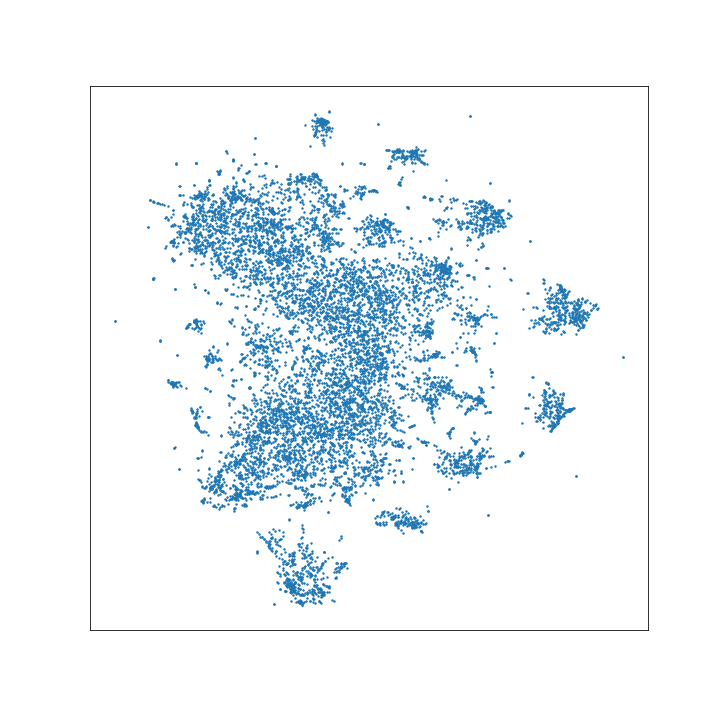

In [ ]:
# TODO: Visualize the coordinates
app2.visualization(save_file="blue_labels.png")
Image("blue_labels.png", width=800)

#### Prepare df with labels

We need to match node embeddings and node IDs to be able to apply labels correctly. 

In [ ]:
# extract coordinates for visualization
coordinates = app2.solver.coordinates
coordinates

array([[-3.573358 , -4.3448663],
       [ 5.3598175,  4.3980417],
       [-0.6623269,  1.1109002],
       ...,
       [-7.290928 ,  8.952293 ],
       [-6.201397 , 10.377372 ],
       [-9.506021 , 10.105833 ]], dtype=float32)

In [ ]:
coordinates[0]

array([-3.573358 , -4.3448663], dtype=float32)

In [ ]:
# create dataframe with node ids and labels.
df = pd.read_csv("/root/.graphvite/dataset/blogcatalog/blogcatalog_label.txt", sep='\t', names=['id','label'])
df

id  label
0        28      1
1        32      1
2        36      1
3        37      1
4        84      1
...     ...    ...
14471  1344     39
14472  1465     39
14473  1550     39
14474  4709     39
14475  7759     39

[14476 rows x 2 columns]

In [ ]:
df['id'].nunique()

10312

In [ ]:
df['id'].value_counts().to_frame()

id
868    11
5129   11
5918   10
4843   10
4148    9
...    ..
8039    1
10088   1
1900    1
5998    1
2049    1

[10312 rows x 1 columns]

In [ ]:
# the same as above, but sorted differently
lab_per_id = df.groupby("id").count()
lab_per_id

label
id          
1          1
2          1
3          1
4          1
5          1
...      ...
10308      1
10309      1
10310      1
10311      2
10312      1

[10312 rows x 1 columns]

In [ ]:
# distribution of nodes by number of labels
# label = number of labels per node
# id = number of labels with this number of nodes
# reset_index() moves indexes to a column
lab_per_id.reset_index().groupby('label').count()

id
label      
1      7460
2      2011
3       564
4       170
5        60
6        27
7        11
8         4
9         1
10        2
11        2

In [ ]:
# number of nodes per label
df.groupby("label").count()

id
label      
1       167
2       778
3       619
4       246
5       908
6       876
7       610
8      1623
9       323
10      405
11      472
12       38
13      514
14      306
15       91
16      415
17      467
18      311
19      986
20      320
21      246
22      287
23      325
24      977
25      201
26      284
27       94
28      112
29      173
30      372
31       98
32      386
33       95
34       64
35       62
36      137
37       53
38       27
39        8

In [ ]:
# since all labels are ordered from smaller to higher, if there are several labels, 
# the smaller ones will be kept by the code below.
df_unique = df.drop_duplicates(subset=['id'], ignore_index=True)
df_unique

id  label
0        28      1
1        32      1
2        36      1
3        37      1
4        84      1
...     ...    ...
10307  8994     38
10308  9716     38
10309  1344     39
10310  1465     39
10311  4709     39

[10312 rows x 2 columns]

In [ ]:
sum_cl1 = df_unique['label'].value_counts().sort_index().to_frame()
sum_cl1

label
1     167
2     759
3     582
4     236
5     843
6     735
7     514
8    1423
9     255
10    275
11    317
12     27
13    338
14    183
15     46
16    307
18    218
19    581
20    218
21    192
22    148
23    230
24    586
25     95
26    185
27     59
28     54
29     97
30    177
31     54
32    184
33     47
34     28
35     32
36     66
37     34
38     17
39      3

In [ ]:
# shuffle data frame before removing duplicates, not to give preference to classes with lower indices.
np.random.seed(5)
df = df.reindex(np.random.permutation(df.index))
df_unique2 = df.drop_duplicates(subset=['id'], ignore_index=True)
df_unique2

id  label
0      2383     24
1      9233      4
2       687     20
3      9183     17
4      9629      7
...     ...    ...
10307  1701      5
10308  4746     20
10309  7757      8
10310  8687     19
10311  3085      6

[10312 rows x 2 columns]

In [ ]:
sum_cl2 = df_unique2['label'].value_counts().sort_index().to_frame()
sum_cl2

label
1     100
2     610
3     466
4     164
5     718
6     651
7     460
8    1252
9     262
10    295
11    333
12     25
13    221
14    213
15     54
16    316
17    182
18    235
19    656
20    236
21    208
22    195
23    252
24    719
25    128
26    210
27     70
28     68
29    126
30    245
31     66
32    256
33     66
34     46
35     44
36     98
37     38
38     22
39      6

In [ ]:
# compare the initial number of nodes per label (blue) vs randomly selected (red)
from bokeh.plotting import figure, show, output_notebook

output_notebook()

p = figure()

p.line(x=range(1,40), y=df['label'].value_counts().sort_index())
# this series does not contain one label (17), so removed this line.
# p.line(x=range(1,40), y=df_unique['label'].value_counts().sort_index(), line_color="orange")
p.line(x=range(1,40), y=sum_cl2['label'],line_color="red")

show(p)  

In [ ]:
# name2id is a dictionary, with the key being node id and the value being its position in the order of embeddings.
# Get position of vertex embedding of node "1" in an embedding list
print(name2id["10061"])

# Get the vertex embedding of node "1"
print(vertex_embeddings[name2id["10061"]])

10306
[-0.39658895  0.11160868  0.23013787  0.09682082 -0.06376748 -0.54343593
  0.26435295  0.15934029  0.3673332  -0.08516978 -0.2031711  -0.01380879
 -0.18972448  0.06871776  0.23699225 -0.09409134  0.38373166 -0.35849807
  0.15789534 -0.20753357 -0.29925752  0.09004117  0.040715    0.24819401
  0.21332863 -0.10012335 -0.40648502 -0.20886713  0.12934491 -0.2561806
 -0.3555957  -0.10091373  0.29968193  0.08048853 -0.06316368  0.17888105
 -0.07739813 -0.08090945 -0.16860294 -0.11573175 -0.01417735  0.16589198
  0.11508625 -0.12906362  0.03468674 -0.01189122 -0.09842802  0.08255398
  0.07384233  0.02246654  0.08768138  0.06892827  0.01350681 -0.03914715
 -0.11366686 -0.13510872 -0.04866773  0.00424001  0.16805232  0.17381148
  0.17432606 -0.10725123  0.06390582  0.21995105  0.0760392  -0.21814984
 -0.09968606 -0.3127439   0.05663809  0.19237925  0.34034577 -0.26142755
 -0.02089576  0.32839116  0.06325669 -0.14148639  0.11013112 -0.24575736
  0.61049587  0.20916781  0.3585138  -0.232652

In [ ]:
type(name2id)

dict

In [ ]:
len(name2id)

10308

In [ ]:
# create a dataframe with node id and position of its embedding in the embedding list
id_pos = pd.DataFrame.from_dict(name2id,orient='index')
id_pos = id_pos.reset_index() # index to columns
id_pos.columns = ['id','position'] # rename cols
id_pos['id'] = id_pos['id'].astype(int) # convert id from text to integer (to match dfs later)
# sort df by position: the order of ids will match the order of embeddings 
id_pos = id_pos.sort_values(by='position', axis=0)
id_pos

id  position
2943      1         0
6089    176         1
6650    283         2
4340    371         3
3585    394         4
...     ...       ...
8453   9925     10303
5533  10001     10304
7429  10008     10305
0     10061     10306
1146  10229     10307

[10308 rows x 2 columns]

In [ ]:
id_pos.describe() # position goes from 0 to 10307, nice!

id      position
count  10308.000000  10308.000000
mean    5156.993694   5153.500000
std     2977.163997   2975.807621
min        1.000000      0.000000
25%     2578.750000   2576.750000
50%     5157.500000   5153.500000
75%     7735.250000   7730.250000
max    10312.000000  10307.000000

In [ ]:
df_unique2['two_cl'] = 99
df_unique2['two_cl'][df_unique2['label']==7] = 7
df_unique2['two_cl'][df_unique2['label']==24] = 24

df_unique2['two_cl2'] = 99
df_unique2['two_cl2'][df_unique2['label']==5] = 5
df_unique2['two_cl2'][df_unique2['label']==8] = 8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
# match label to the correctly ordered id  
id_pos = id_pos.join(df_unique2.set_index('id'), on='id', how='left', lsuffix='', rsuffix='unique')
id_pos

id  position  label  two_cl  two_cl2
2943      1         0     21      99       99
6089    176         1     18      99       99
6650    283         2     34      99       99
4340    371         3      4      99       99
3585    394         4      1      99       99
...     ...       ...    ...     ...      ...
8453   9925     10303      6      99       99
5533  10001     10304      8      99        8
7429  10008     10305     20      99       99
0     10061     10306     36      99       99
1146  10229     10307      4      99       99

[10308 rows x 5 columns]

In [ ]:
df_unique2[df_unique2['id']==28]


id  label  two_cl
3709  28      1      99

In [ ]:
Y = np.array(df_unique2['label'])
Y

array([5, 7, 5, ..., 8, 8, 6])

#### Visualize nodes with different colors

##### All 39 classes colored

In [ ]:
# as a built-in palette in matplotlib allows only 10 colors, we use sns to make 39 colors
import seaborn as sns
# sns.set_palette(sns.color_palette("hls", 39))
sns.set_palette(sns.hls_palette(39, l=.5, s=.7))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


save visualization to `colored_labels.png`


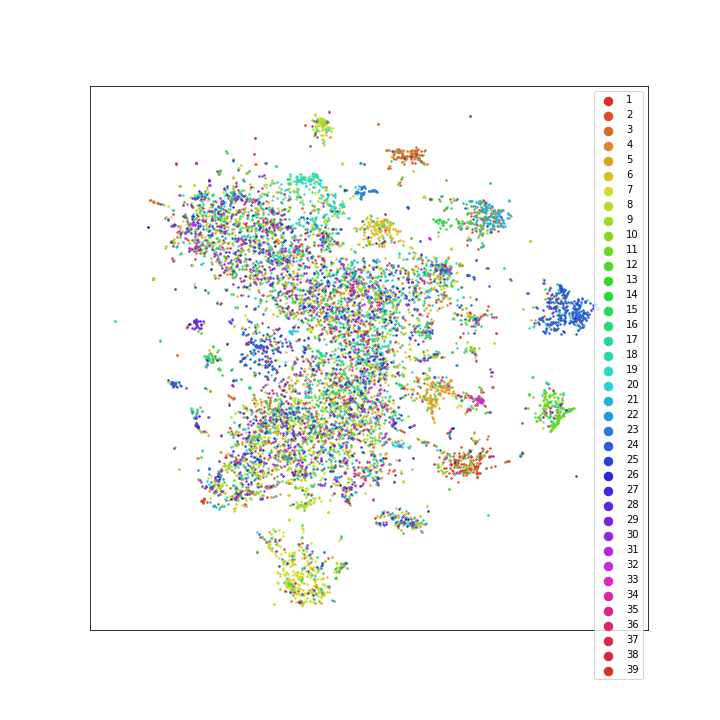

In [ ]:
# color all 39 classes
app2.visualization(Y = id_pos['label'],save_file="colored_labels.png")
Image("colored_labels.png", width=800)

In [ ]:
app2.visualization(Y=id_pos["label"], save_file="colored_39.pdf")
files.download("colored_39.pdf")

save visualization to `colored_38.pdf`


##### Plotting two classes

Use the node classification labels to pick two classes of nodes. Color these nodes in the plot.

**Hint**: For those belonging to both classes, you can randomly assign it to one class, or use a third color to denote them.

**Response:** In the code above (section **'Prepare df with labels'**), for nodes having more than one label, we randomly picked one of the labels for coloring purposes. Code 99 stands for all other classes not selected for plotting.

###### Attempt 1

save visualization to `colored_2cl2.png`


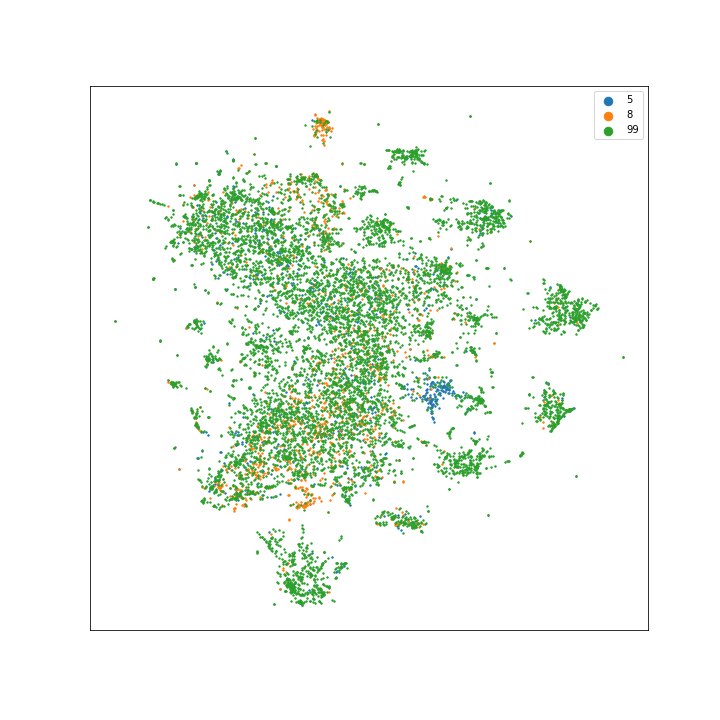

In [ ]:
# plot two classes with the max number of nodes: 5 and 8
# sns.set_palette(sns.hls_palette(3, l=.7, s=.7))
sns.reset_orig()
app2.visualization(Y = id_pos['two_cl2'],save_file="colored_2cl2.png")
Image("colored_2cl2.png", width=800)

In [ ]:
len(coordinates[np.logical_or(id_pos['two_cl2'] == 5, id_pos['two_cl2'] == 8)])

1970

In [ ]:
len(id_pos["label"][np.logical_or(id_pos['two_cl2'] == 5, id_pos['two_cl2'] == 8)])

1970

In [ ]:
# Green on the plot above is overwhelming.
# let's plot ONLY classes 5 and 8.
# There is no real separation between classes.

import matplotlib as mpl

xy1 = coordinates[np.logical_or(id_pos['two_cl2'] == 5, id_pos['two_cl2'] == 8)]
xy1_t = np.transpose(xy1)
Y1 = id_pos["label"][np.logical_or(id_pos['two_cl2'] == 5, id_pos['two_cl2'] == 8)]

output_notebook()

x = xy1_t[0]
y = xy1_t[1]
col = Y1
colors = ["#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.coolwarm(mpl.colors.Normalize()(col))]

p = figure()
p.scatter(x, y, fill_color=colors, fill_alpha=0.5,line_color=None)
show(p) 

###### Attempt 2

save visualization to `colored_2cl.png`


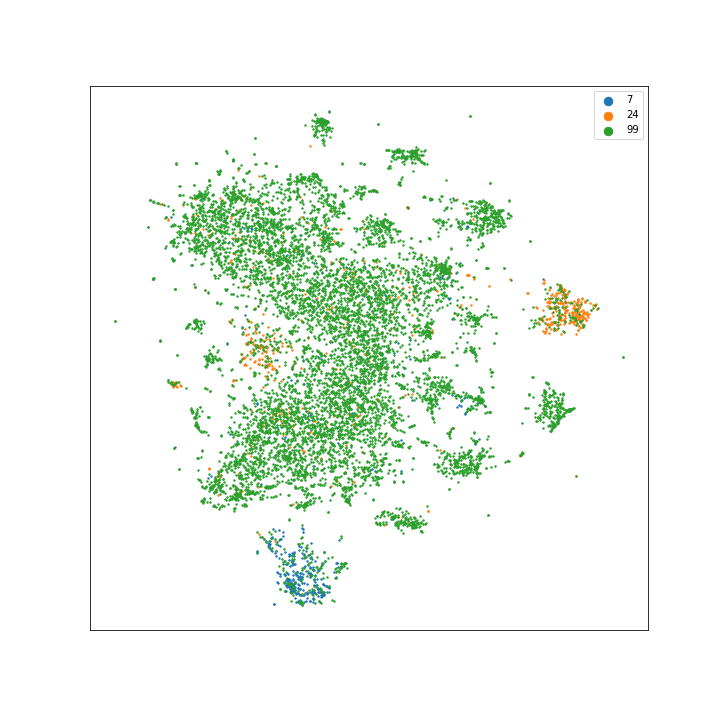

In [ ]:
# plot other two classes
sns.reset_orig()
app2.visualization(Y = id_pos['two_cl'],save_file="colored_2cl.png")
Image("colored_2cl.png", width=800)

In [ ]:
# Green on the plot above is overwhelming.
# let's plot ONLY classes 7 and 24.
# The separation between these classes is better than for two classes above.

import matplotlib as mpl

xy1 = coordinates[np.logical_or(id_pos['two_cl'] == 7, id_pos['two_cl'] == 24)]
xy1_t = np.transpose(xy1)
Y1 = id_pos["label"][np.logical_or(id_pos['two_cl'] == 7, id_pos['two_cl'] == 24)]

output_notebook()

x = xy1_t[0]
y = xy1_t[1]
col = Y1
colors = ["#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.coolwarm(mpl.colors.Normalize()(col))]

p = figure()
p.scatter(x, y, fill_color=colors, fill_alpha=0.5,line_color=None)
show(p) 

#### Conclusion

Are the node embeddings learned from BlogCatalog good? Why or why not?

**Answer:** Plotting all 39 classes with different colors allows us to discover a messy central part of the plot where many classes mingle and a few small and rather homogenous islets (clusters) situated on the periphery.

When we pick just two classes, in one case, we almost don't see any separation between classes (classes 5 and 8), only two tiny islets stand out. In the other case, there are two dense clusters belonging to each of the classes (7 and 24), one less dense cluster of 24 (red) and a large 'sparse' zone where two classes mix. 

Overall, even though our learnt embeddings don't separate classes quite well, they are still capable of finding several stand-alone vertex clusters and some structure in the network. Given that these embeddings were learnt in an unsupervised manner, and that we project 128-dimensional space on a 2D plot, this result is quite a decent one. 

Additional information (for example, undestanding what hides behind each class label) could shed light whether these clusters-islets could help us make some discoveries. For example, what if small/dense clusters show professional groups and thus connect people with the same interests while the mixed center might represent friend groups/people with versatile interests focusing less on a single sphere.


## 2. Graph Convolutional Networks (50 points)

For this part, we are going to implement the GCN model for node classification, where the Cora dataset is used for testing the model. 

The Cora dataset is avaible [here](https://drive.google.com/open?id=1wVguWcuHEfga09XgLPvC_PkRXTGEEInW). You could find several files there. Among those files, net.txt provides the edges between different nodes, and the three columns correspond to source nodes, target nodes and edge weights respectively. For feature.txt, it gives the features of nodes. For label.txt, it provides the node labels. train.txt, valid.txt, test.txt provide the training nodes, validation nodes and test nodes respectively.

The goal is to train a model on the training nodes, and further apply the model for classifying test nodes. In this process, you may use the validation nodes for hyper-parameter tuning and early stopping.

### 1) Implement the GCN model

In the first step, please implement a GCN model in the following code block.

#### Load and explore data from link

In [ ]:
# download the repo to get access to data
# !rm -rf GNN-on-Cora-dataset/
!git clone https://github.com/millasni/GNN-on-Cora-dataset/

Cloning into 'GNN-on-Cora-dataset'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 60 (delta 20), reused 40 (delta 11), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [ ]:
import pandas as pd
train = pd.read_csv('GNN-on-Cora-dataset/gnn-cora/train.txt',names=['id']) 
test = pd.read_csv('GNN-on-Cora-dataset/gnn-cora/test.txt',names=['id']) 
valid = pd.read_csv('GNN-on-Cora-dataset/gnn-cora/valid.txt',names=['id']) 
net = pd.read_csv('GNN-on-Cora-dataset/gnn-cora/net.txt', sep="\t",names=['source','target','weight']) 
label = pd.read_csv('GNN-on-Cora-dataset/gnn-cora/label.txt', sep="\t",names=['id','class']) 
feature = pd.read_csv('GNN-on-Cora-dataset/gnn-cora/feature.txt',sep="\t",names=['id','feature']) # need to do sth with it!

In [ ]:
print(train)
print(valid)
print(test)

      id
0      0
1      1
2      2
3      3
4      4
..   ...
135  135
136  136
137  137
138  138
139  139

[140 rows x 1 columns]
      id
0    140
1    141
2    142
3    143
4    144
..   ...
495  635
496  636
497  637
498  638
499  639

[500 rows x 1 columns]
       id
0    1708
1    1709
2    1710
3    1711
4    1712
..    ...
995  2703
996  2704
997  2705
998  2706
999  2707

[1000 rows x 1 columns]


In [ ]:
train.shape, valid.shape, test.shape, net.shape, label.shape,feature.shape

((140, 1), (500, 1), (1000, 1), (10556, 3), (1640, 2), (2708, 2))

In [ ]:
5429*2

10858

In [ ]:
label.head()

id  class
0   0      3
1   1      4
2   2      4
3   3      0
4   4      3

In [ ]:
label['class'].value_counts() # 7 classes, somewhat imbalanced dataset.

3    497
4    250
2    242
0    211
5    180
1    147
6    113
Name: class, dtype: int64

In [ ]:
net.head(7)

source  target  weight
0       0     633       1
1       0    1862       1
2       0    2582       1
3       1       2       1
4       1     652       1
5       1     654       1
6       2       1       1

In [ ]:
net.describe() # all weights = 1

source        target   weight
count  10556.000000  10556.000000  10556.0
mean    1309.228685   1309.228685      1.0
std      748.882272    748.882272      0.0
min        0.000000      0.000000      1.0
25%      651.000000    651.000000      1.0
50%     1358.000000   1358.000000      1.0
75%     1940.250000   1940.250000      1.0
max     2707.000000   2707.000000      1.0

In [ ]:
feature

id                                            feature
0        0  19:1.0 81:1.0 146:1.0 315:1.0 774:1.0 877:1.0 ...
1        1  19:1.0 88:1.0 149:1.0 212:1.0 233:1.0 332:1.0 ...
2        2  19:1.0 89:1.0 128:1.0 322:1.0 381:1.0 480:1.0 ...
3        3  93:1.0 283:1.0 359:1.0 402:1.0 452:1.0 470:1.0...
4        4  3:1.0 81:1.0 337:1.0 586:1.0 698:1.0 747:1.0 8...
...    ...                                                ...
2703  2703  5:1.0 19:1.0 182:1.0 187:1.0 301:1.0 317:1.0 4...
2704  2704  2:1.0 140:1.0 205:1.0 335:1.0 1042:1.0 1247:1....
2705  2705  64:1.0 207:1.0 262:1.0 697:1.0 753:1.0 872:1.0...
2706  2706  19:1.0 247:1.0 498:1.0 520:1.0 774:1.0 775:1.0...
2707  2707  19:1.0 186:1.0 329:1.0 447:1.0 454:1.0 754:1.0...

[2708 rows x 2 columns]

In [ ]:
net[net['source']==19]

source  target  weight
63      19    1939       1

In [ ]:
net[net['target']==19]

source  target  weight
7911    1939      19       1

In [ ]:
net[net['target']==0]

source  target  weight
2569      633       0       1
7565     1862       0       1
10306    2582       0       1

In [ ]:
net[net['target']==1]

source  target  weight
6          2       1       1
2640     652       1       1
2643     654       1       1

#### Install pygcn

In [ ]:
!git clone https://github.com/tkipf/pygcn.git

Cloning into 'pygcn'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.


In [ ]:
import sys
sys.path.insert(0,'pygcn')

In [ ]:
from torch import nn, optim
from torch.utils import data
import torch.nn as nn
import torch.nn.functional as F
import pygcn
from pygcn.layers import GraphConvolution
from pygcn.utils import load_data,accuracy,encode_onehot,normalize,sparse_mx_to_torch_sparse_tensor
from pygcn.models import GCN

from __future__ import division
from __future__ import print_function

import time
import argparse

In [ ]:
import matplotlib.pyplot as plt

#### Load Cora dataset from pygcn

It has another split into train/val/test, so we need to adapt data loading funcuntion and load data again.

In [ ]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path='pygcn/data/cora/')

Loading cora dataset...


#### Adapt function for Cora loading and load data again

Split data into 3 sets according to the data split in a link in the homework description

In [ ]:
import scipy.sparse as sp

def load_data(path="../data/cora/", dataset="cora"):
    print('Loading {} dataset...'.format(dataset))

    idx_features_labels = np.genfromtxt("{}{}.content".format(path, dataset),
                                        dtype=np.dtype(str))
    features = sp.csr_matrix(idx_features_labels[:, 1:-1], dtype=np.float32)
    labels = encode_onehot(idx_features_labels[:, -1])

    # build graph
    idx = np.array(idx_features_labels[:, 0], dtype=np.int32)
    idx_map = {j: i for i, j in enumerate(idx)}
    edges_unordered = np.genfromtxt("{}{}.cites".format(path, dataset),
                                    dtype=np.int32)
    edges = np.array(list(map(idx_map.get, edges_unordered.flatten())),
                     dtype=np.int32).reshape(edges_unordered.shape)
    adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                        shape=(labels.shape[0], labels.shape[0]),
                        dtype=np.float32)

    # build symmetric adjacency matrix
    adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)

    features = normalize(features)
    adj = normalize(adj + sp.eye(adj.shape[0]))

    idx_train = range(140)
    idx_val = range(140, 640)
    idx_test = range(1708, 2708)

    features = torch.FloatTensor(np.array(features.todense()))
    labels = torch.LongTensor(np.where(labels)[1])
    adj = sparse_mx_to_torch_sparse_tensor(adj)

    idx_train = torch.LongTensor(idx_train)
    idx_val = torch.LongTensor(idx_val)
    idx_test = torch.LongTensor(idx_test)

    return adj, features, labels, idx_train, idx_val, idx_test

In [ ]:
adj, features, labels, idx_train, idx_val, idx_test = load_data(path='pygcn/data/cora/')

Loading cora dataset...


In [ ]:
# check loaded cora dataset
adj

tensor(indices=tensor([[   0,    8,   14,  ..., 1389, 2344, 2707],
                       [   0,    0,    0,  ..., 2707, 2707, 2707]]),
       values=tensor([0.1667, 0.1667, 0.0500,  ..., 0.2000, 0.5000, 0.2500]),
       size=(2708, 2708), nnz=13264, layout=torch.sparse_coo)

In [ ]:
features

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
features.shape

torch.Size([2708, 1433])

In [ ]:
 torch.sum(features,1) # sum over row. features are normalized to sum up to 1.

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [ ]:
torch.sum(features,0) # sum over columns

tensor([0.7399, 1.6961, 3.4994,  ..., 0.3656, 3.2537, 0.6146])

In [ ]:
labels

tensor([4, 5, 2,  ..., 6, 1, 4])

In [ ]:
labels.unique()

tensor([0, 1, 2, 3, 4, 5, 6])

#### GCN implementation

In [ ]:
# adapt GCN model implementation from pygcn package
# change negative log-lik criterion to cross-entropy loss 
# (but both give the same result, the former requiring also a softmax application to outputs)

class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        # return F.log_softmax(x, dim=1) # if we use negative log-lik
        return x # if we want to use cross-entropy loss

In [ ]:
# Training settings (from pygcn github)
parser = argparse.ArgumentParser()
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='Disables CUDA training.')
parser.add_argument('--fastmode', action='store_true', default=False,
                    help='Validate during training pass.')
parser.add_argument('--seed', type=int, default=42, help='Random seed.')
parser.add_argument('--epochs', type=int, default=200, 
                    help='Number of epochs to train.')
parser.add_argument('--lr', type=float, default=0.01, help='Initial learning rate.')
parser.add_argument('--weight_decay', type=float, default=5e-4,
                    help='Weight decay (L2 loss on parameters).')
parser.add_argument('--hidden', type=int, default=16, help='Number of hidden units.')
parser.add_argument('--dropout', type=float, default=0.5, 
                    help='Dropout rate (1 - keep probability).')

args = parser.parse_args(args=[])

##### Two good combinations of LR and weight decay

I tried different lr and weight decay and the below params seem good enough

Due to the small training size, we need to look at both validation loss and accuracy. Good accuracy and bad loss on validation results in sub-optimal performance on the test set.

Epoch: 0001 loss_train: 1.9517 acc_train: 0.2143 loss_val: 1.9498 acc_val: 0.1360 time: 0.0059s
Epoch: 0002 loss_train: 1.9478 acc_train: 0.2000 loss_val: 1.9381 acc_val: 0.1360 time: 0.0056s
Epoch: 0003 loss_train: 1.9242 acc_train: 0.2000 loss_val: 1.9266 acc_val: 0.1360 time: 0.0056s
Epoch: 0004 loss_train: 1.9231 acc_train: 0.2000 loss_val: 1.9152 acc_val: 0.1360 time: 0.0053s
Epoch: 0005 loss_train: 1.9034 acc_train: 0.2000 loss_val: 1.9039 acc_val: 0.1360 time: 0.0055s
Epoch: 0006 loss_train: 1.8835 acc_train: 0.2143 loss_val: 1.8930 acc_val: 0.1360 time: 0.0052s
Epoch: 0007 loss_train: 1.8716 acc_train: 0.2143 loss_val: 1.8821 acc_val: 0.1360 time: 0.0054s
Epoch: 0008 loss_train: 1.8561 acc_train: 0.2214 loss_val: 1.8714 acc_val: 0.1360 time: 0.0055s
Epoch: 0009 loss_train: 1.8516 acc_train: 0.2571 loss_val: 1.8608 acc_val: 0.1360 time: 0.0053s
Epoch: 0010 loss_train: 1.8474 acc_train: 0.2643 loss_val: 1.8506 acc_val: 0.1560 time: 0.0054s
Epoch: 0011 loss_train: 1.8449 acc_train

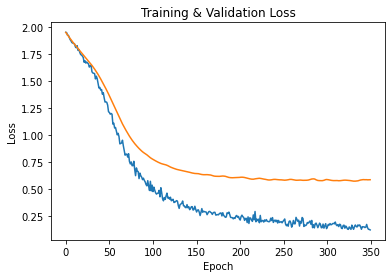

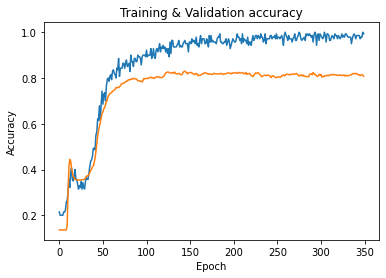

In [ ]:
# Training settings
EPOCHS = 350
LR = 0.01
WD = 1e-4

args.cuda = not args.no_cuda and torch.cuda.is_available()

np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

# Model and optimizer
model = GCN(nfeat=features.shape[1],
            nhid=args.hidden,
            nclass=labels.max().item() + 1,
            dropout=args.dropout)
optimizer = optim.Adam(model.parameters(),
                       lr=LR, weight_decay=WD)

if args.cuda:
    model.cuda()
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_train = idx_train.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()
    
# collect train/valid stats for plots
loss_tr = []
acc_tr = []
loss_v = []
acc_v = []

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    # loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])

    loss_tr.append(loss_train) # collect train loss
    acc_tr.append(acc_train) # collect train accuracy

    loss_train.backward()
    optimizer.step()

    if not args.fastmode:
        # Evaluate validation set performance separately,
        # deactivates dropout during validation run.
        model.eval()
        output = model(features, adj)

    # loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])

    loss_v.append(loss_val) # collect train loss
    acc_v.append(acc_val) # collect train accuracy

    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))

def test():
    model.eval()
    output = model(features, adj)
    # loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

# Plot train and valid loss
plt.plot(loss_tr, label="Train loss")
plt.plot(loss_v, label="Validation loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot train and valid accuracy
plt.plot(acc_tr, label="Train accuracy")
plt.plot(acc_v, label="Validation accuracy")
plt.title("Training & Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

Epoch: 0001 loss_train: 1.9517 acc_train: 0.2143 loss_val: 1.9012 acc_val: 0.1360 time: 0.0079s
Epoch: 0002 loss_train: 1.8957 acc_train: 0.2000 loss_val: 1.8504 acc_val: 0.1380 time: 0.0055s
Epoch: 0003 loss_train: 1.8278 acc_train: 0.3571 loss_val: 1.8019 acc_val: 0.4200 time: 0.0054s
Epoch: 0004 loss_train: 1.7971 acc_train: 0.3643 loss_val: 1.7605 acc_val: 0.3520 time: 0.0052s
Epoch: 0005 loss_train: 1.7339 acc_train: 0.3286 loss_val: 1.7236 acc_val: 0.3500 time: 0.0054s
Epoch: 0006 loss_train: 1.6962 acc_train: 0.3071 loss_val: 1.6906 acc_val: 0.3500 time: 0.0051s
Epoch: 0007 loss_train: 1.6456 acc_train: 0.3000 loss_val: 1.6527 acc_val: 0.3520 time: 0.0056s
Epoch: 0008 loss_train: 1.5885 acc_train: 0.3143 loss_val: 1.6081 acc_val: 0.3660 time: 0.0054s
Epoch: 0009 loss_train: 1.5334 acc_train: 0.4357 loss_val: 1.5609 acc_val: 0.4240 time: 0.0053s
Epoch: 0010 loss_train: 1.4777 acc_train: 0.4714 loss_val: 1.5042 acc_val: 0.5280 time: 0.0054s
Epoch: 0011 loss_train: 1.4040 acc_train

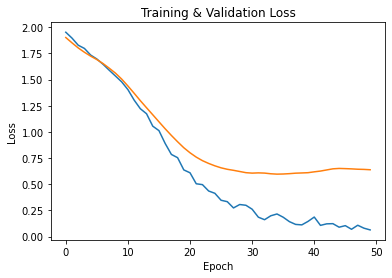

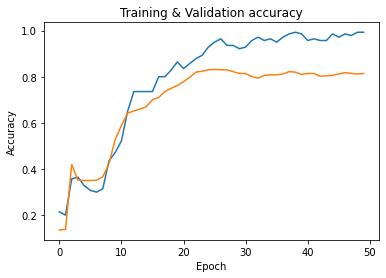

In [ ]:
# Training settings
EPOCHS = 50 
LR = 0.05
WD = 1e-5

args.cuda = not args.no_cuda and torch.cuda.is_available()

np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

# Model and optimizer
model = GCN(nfeat=features.shape[1],
            nhid=args.hidden,
            nclass=labels.max().item() + 1,
            dropout=args.dropout)
optimizer = optim.Adam(model.parameters(),
                       lr=LR, weight_decay=WD)

if args.cuda:
    model.cuda()
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_train = idx_train.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()
    
# collect train/valid stats for plots
loss_tr = []
acc_tr = []
loss_v = []
acc_v = []

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    # loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])

    loss_tr.append(loss_train) # collect train loss
    acc_tr.append(acc_train) # collect train accuracy

    loss_train.backward()
    optimizer.step()

    if not args.fastmode:
        # Evaluate validation set performance separately,
        # deactivates dropout during validation run.
        model.eval()
        output = model(features, adj)

    # loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])

    loss_v.append(loss_val) # collect train loss
    acc_v.append(acc_val) # collect train accuracy

    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))

def test():
    model.eval()
    output = model(features, adj)
    # loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

# Plot train and valid loss
plt.plot(loss_tr, label="Train loss")
plt.plot(loss_v, label="Validation loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot train and valid accuracy
plt.plot(acc_tr, label="Train accuracy")
plt.plot(acc_v, label="Validation accuracy")
plt.title("Training & Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### 2) Performance w.r.t. the number of layers

Most GNN models only use a few layers for information propagation. Otherwise, they may suffer from the over-smoothing problem. To look into that, please fill in the following table to show the performance of your GNN model with respect to the number of propagation layers.

**Response:** We tried two criteria for training early stopping: validation loss and validation accuracy. In both cases, learning rate was equal to 0.01, weight decay was set to 0, max number of epochs was 900 and patience was 100 (we allowed continuation of training for 100 epochs without a criterion improvement). Weights corresponding to the epoch with the best criterion value were applied to get test predictions. 

| Number of GCN layers                   | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    |
|----------------------------------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Test accuracy after early stopping by: |       |       |       |       |       |       |       |       |       |       |
| Validation loss                        | 64.5% | 74.8% | 69.5% | 62.0% | 37.7% | 43.1% | 33.2% | 32.6% | 40.2% | 26.1% |
| Validation accuracy                    | 60.3% | 75.3% | 69.9% | 62.8% | 63.0% | 54.0% | 40.8% | 39.0% | 38.8% | 36.9% |
| Number of training epochs, early stopping by:             |       |       |       |       |       |       |       |       |       |       |
| Validation loss                        | 900   | 213   | 102   | 94    | 67    | 62    | 45    | 84    | 71    | 80    |
| Validation accuracy                    | 338   | 184   | 101   | 160   | 294   | 303   | 318   | 215   | 130   | 427   |

For the unknown reason, these test results are reproducible within one colab session but are not reproducible across sessions (from day to day). The following cell shows test results by number of layers (on X axis) and stopping criterion over two sessions (April 16 and 17).


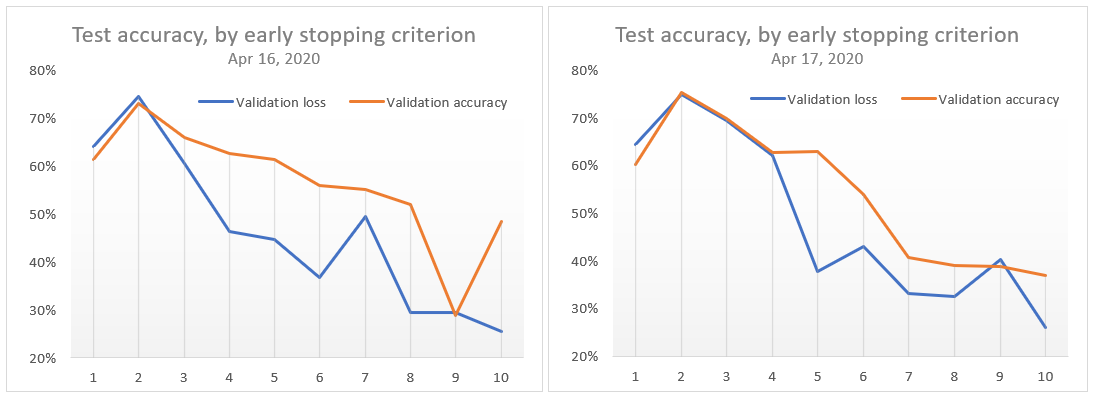

In [ ]:
from IPython.display import Image
Image("GNN-on-Cora-dataset/Layers_1_10.PNG", width=800)

Given the above result, please write down your observation and the potential reason based on your understanding.

**Observations:** Even though my results are not reproducible session-to-session, the trend nonetheless stays the same. The highest test accuracy is reached at two GCN layers. After this, it tends to go down very fast as we increase number of GCN layers. The same trend is observed even if I change learning rate and/or weight decay (though test accuracy for the same architecture will vary depending on hyperparameters).  

**Reasons:** As some research has shown, increased number of GCN layers will lead to decreased model performance. This happens because of the so-called over-smoothing problem when repetitive graph convolution operation produces so similar embeddings of various nodes that nodes may become indistinguishable, and as such the difference 
between nodes belonging to different classes is blurred, resulting in lower test accuracy. This paper confirms that the above results are not surprising: https://arxiv.org/pdf/1909.03211.pdf

In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
output_dir = './drive/My Drive/DL/HW3/' 

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Define models

In [ ]:
# define all model classes
class GCN1(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN1, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nclass)

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = self.gc1(x, adj)
        return x # if we want to use cross-entropy loss

class GCN2(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN2, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x # if we want to use cross-entropy loss

class GCN3(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN3, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc3(x, adj)
        return x # if we want to use cross-entropy loss

class GCN4(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN4, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc4(x, adj)
        return x # if we want to use cross-entropy loss

class GCN5(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN5, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nhid)
        self.gc5 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc5(x, adj)
        return x # if we want to use cross-entropy loss

class GCN6(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN6, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nhid)
        self.gc5 = GraphConvolution(nhid, nhid)
        self.gc6 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = F.relu(self.gc5(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc6(x, adj)
        return x # if we want to use cross-entropy loss

class GCN7(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN7, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nhid)
        self.gc5 = GraphConvolution(nhid, nhid)
        self.gc6 = GraphConvolution(nhid, nhid)
        self.gc7 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = F.relu(self.gc5(x, adj))
        x = F.relu(self.gc6(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc7(x, adj)
        return x # if we want to use cross-entropy loss

class GCN8(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN8, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nhid)
        self.gc5 = GraphConvolution(nhid, nhid)
        self.gc6 = GraphConvolution(nhid, nhid)
        self.gc7 = GraphConvolution(nhid, nhid)
        self.gc8 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = F.relu(self.gc5(x, adj))
        x = F.relu(self.gc6(x, adj))
        x = F.relu(self.gc7(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc8(x, adj)
        return x # if we want to use cross-entropy loss

class GCN9(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN9, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nhid)
        self.gc5 = GraphConvolution(nhid, nhid)
        self.gc6 = GraphConvolution(nhid, nhid)
        self.gc7 = GraphConvolution(nhid, nhid)
        self.gc8 = GraphConvolution(nhid, nhid)
        self.gc9 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = F.relu(self.gc5(x, adj))
        x = F.relu(self.gc6(x, adj))
        x = F.relu(self.gc7(x, adj))
        x = F.relu(self.gc8(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc9(x, adj)
        return x # if we want to use cross-entropy loss

class GCN10(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN10, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nhid)
        self.gc3 = GraphConvolution(nhid, nhid)
        self.gc4 = GraphConvolution(nhid, nhid)
        self.gc5 = GraphConvolution(nhid, nhid)
        self.gc6 = GraphConvolution(nhid, nhid)
        self.gc7 = GraphConvolution(nhid, nhid)
        self.gc8 = GraphConvolution(nhid, nhid)
        self.gc9 = GraphConvolution(nhid, nhid)
        self.gc10 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.relu(self.gc2(x, adj))
        x = F.relu(self.gc3(x, adj))
        x = F.relu(self.gc4(x, adj))
        x = F.relu(self.gc5(x, adj))
        x = F.relu(self.gc6(x, adj))
        x = F.relu(self.gc7(x, adj))
        x = F.relu(self.gc8(x, adj))
        x = F.relu(self.gc9(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc10(x, adj)
        return x # if we want to use cross-entropy loss

#### Define training, testing and plotting functions

In [ ]:
def train(epoch):
  t = time.time()
  model.train()
  optimizer.zero_grad()
  output = model(features, adj)
  loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
  acc_train = accuracy(output[idx_train], labels[idx_train])

  loss_train.backward()
  optimizer.step()

  if not args.fastmode:
      # Evaluate validation set performance separately,
      # deactivates dropout during validation run.
      model.eval()
      output = model(features, adj)

  loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
  acc_val = accuracy(output[idx_val], labels[idx_val])

  print('Epoch: {:04d}'.format(epoch+1),
        'loss_train: {:.4f}'.format(loss_train.item()),
        'acc_train: {:.4f}'.format(acc_train.item()),
        'loss_val: {:.4f}'.format(loss_val.item()),
        'acc_val: {:.4f}'.format(acc_val.item()),
        'time: {:.4f}s'.format(time.time() - t))
  # return all main train and validation stats 
  return loss_train.item(), acc_train.item(), loss_val.item(), acc_val.item()

def test():
  model.eval()
  output = model(features, adj)
  loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
  acc_test = accuracy(output[idx_test], labels[idx_test])
  print("Test set results:",
        "loss= {:.4f}".format(loss_test.item()),
        "accuracy= {:.4f}".format(acc_test.item()))

def plot_loss(train_loss, valid_loss):
  # Plot train and valid loss
  plt.plot(train_loss, label="Train loss")
  plt.plot(valid_loss, label="Validation loss")
  plt.title("Training & Validation Loss, " + str(index+1) + " layers")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

def plot_acc(train_acc, valid_acc):
  # Plot train and valid accuracy
  plt.plot(train_acc, label="Train accuracy")
  plt.plot(valid_acc, label="Validation accuracy")
  plt.title("Training & Validation accuracy, " + str(index+1) + " layers")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.show()

#### Instantiate and train models

##### Using validation loss

In [ ]:
# define model instances

np.random.seed(args.seed)
torch.manual_seed(args.seed)

model1 = GCN1(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model2 = GCN2(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model3 = GCN3(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model4 = GCN4(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model5 = GCN5(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model6 = GCN6(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model7 = GCN7(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model8 = GCN8(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model9 = GCN9(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model10 = GCN10(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

# create a list of models to iterate over
model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]

1 layers
Epoch: 0001 loss_train: 1.9674 acc_train: 0.1429 loss_val: 1.9800 acc_val: 0.1460 time: 0.0042s
Epoch: 0002 loss_train: 1.9537 acc_train: 0.2071 loss_val: 1.9698 acc_val: 0.1360 time: 0.0037s
Epoch: 0003 loss_train: 1.9401 acc_train: 0.2143 loss_val: 1.9599 acc_val: 0.1340 time: 0.0035s
Epoch: 0004 loss_train: 1.9267 acc_train: 0.2071 loss_val: 1.9500 acc_val: 0.1360 time: 0.0035s
Epoch: 0005 loss_train: 1.9135 acc_train: 0.2071 loss_val: 1.9403 acc_val: 0.1360 time: 0.0036s
Epoch: 0006 loss_train: 1.9004 acc_train: 0.2071 loss_val: 1.9307 acc_val: 0.1360 time: 0.0034s
Epoch: 0007 loss_train: 1.8875 acc_train: 0.2071 loss_val: 1.9213 acc_val: 0.1360 time: 0.0035s
Epoch: 0008 loss_train: 1.8748 acc_train: 0.2000 loss_val: 1.9121 acc_val: 0.1360 time: 0.0035s
Epoch: 0009 loss_train: 1.8623 acc_train: 0.2000 loss_val: 1.9030 acc_val: 0.1360 time: 0.0036s
Epoch: 0010 loss_train: 1.8499 acc_train: 0.2000 loss_val: 1.8941 acc_val: 0.1360 time: 0.0035s
Epoch: 0011 loss_train: 1.8377 

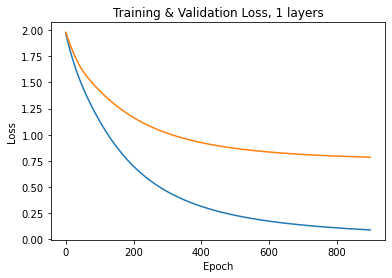

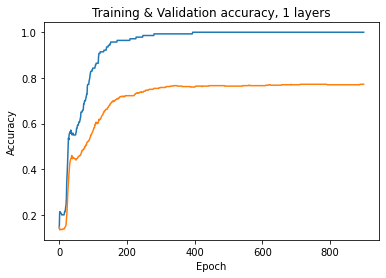

2 layers
Epoch: 0001 loss_train: 1.9649 acc_train: 0.2000 loss_val: 1.9936 acc_val: 0.1360 time: 0.0080s
Epoch: 0002 loss_train: 1.9455 acc_train: 0.1929 loss_val: 1.9748 acc_val: 0.1360 time: 0.0056s
Epoch: 0003 loss_train: 1.9393 acc_train: 0.2000 loss_val: 1.9571 acc_val: 0.1360 time: 0.0054s
Epoch: 0004 loss_train: 1.9253 acc_train: 0.1929 loss_val: 1.9401 acc_val: 0.1360 time: 0.0055s
Epoch: 0005 loss_train: 1.9040 acc_train: 0.2000 loss_val: 1.9238 acc_val: 0.1360 time: 0.0052s
Epoch: 0006 loss_train: 1.8915 acc_train: 0.2000 loss_val: 1.9083 acc_val: 0.1360 time: 0.0054s
Epoch: 0007 loss_train: 1.8799 acc_train: 0.2071 loss_val: 1.8934 acc_val: 0.1360 time: 0.0053s
Epoch: 0008 loss_train: 1.8781 acc_train: 0.2286 loss_val: 1.8794 acc_val: 0.1360 time: 0.0063s
Epoch: 0009 loss_train: 1.8597 acc_train: 0.2357 loss_val: 1.8661 acc_val: 0.2620 time: 0.0059s
Epoch: 0010 loss_train: 1.8412 acc_train: 0.3500 loss_val: 1.8535 acc_val: 0.4100 time: 0.0054s
Epoch: 0011 loss_train: 1.8343 

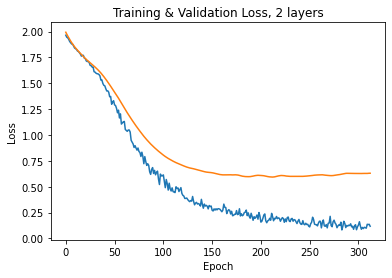

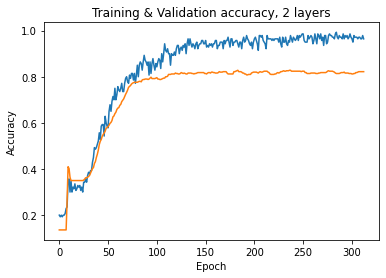

3 layers
Epoch: 0001 loss_train: 1.9344 acc_train: 0.1214 loss_val: 1.9165 acc_val: 0.1340 time: 0.0098s
Epoch: 0002 loss_train: 1.9232 acc_train: 0.1429 loss_val: 1.9041 acc_val: 0.1340 time: 0.0073s
Epoch: 0003 loss_train: 1.9113 acc_train: 0.1571 loss_val: 1.8929 acc_val: 0.1480 time: 0.0070s
Epoch: 0004 loss_train: 1.9016 acc_train: 0.1929 loss_val: 1.8825 acc_val: 0.1360 time: 0.0072s
Epoch: 0005 loss_train: 1.8849 acc_train: 0.3214 loss_val: 1.8723 acc_val: 0.1360 time: 0.0073s
Epoch: 0006 loss_train: 1.8807 acc_train: 0.2929 loss_val: 1.8625 acc_val: 0.1360 time: 0.0077s
Epoch: 0007 loss_train: 1.8716 acc_train: 0.2286 loss_val: 1.8524 acc_val: 0.1360 time: 0.0072s
Epoch: 0008 loss_train: 1.8557 acc_train: 0.2929 loss_val: 1.8423 acc_val: 0.2660 time: 0.0071s
Epoch: 0009 loss_train: 1.8538 acc_train: 0.2500 loss_val: 1.8330 acc_val: 0.4420 time: 0.0071s
Epoch: 0010 loss_train: 1.8207 acc_train: 0.3143 loss_val: 1.8236 acc_val: 0.4240 time: 0.0071s
Epoch: 0011 loss_train: 1.8484 

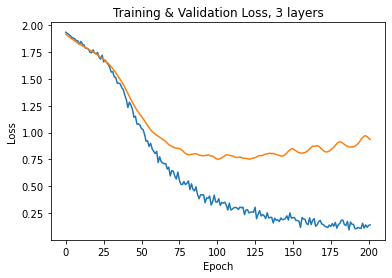

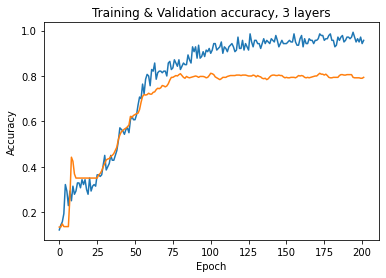

4 layers
Epoch: 0001 loss_train: 1.9620 acc_train: 0.1214 loss_val: 1.9271 acc_val: 0.1340 time: 0.0127s
Epoch: 0002 loss_train: 1.9426 acc_train: 0.1214 loss_val: 1.9107 acc_val: 0.1340 time: 0.0091s
Epoch: 0003 loss_train: 1.9292 acc_train: 0.1357 loss_val: 1.8960 acc_val: 0.1340 time: 0.0088s
Epoch: 0004 loss_train: 1.9157 acc_train: 0.1857 loss_val: 1.8834 acc_val: 0.3500 time: 0.0092s
Epoch: 0005 loss_train: 1.9071 acc_train: 0.2214 loss_val: 1.8724 acc_val: 0.3500 time: 0.0086s
Epoch: 0006 loss_train: 1.8862 acc_train: 0.2929 loss_val: 1.8612 acc_val: 0.3500 time: 0.0095s
Epoch: 0007 loss_train: 1.8589 acc_train: 0.2929 loss_val: 1.8500 acc_val: 0.3500 time: 0.0086s
Epoch: 0008 loss_train: 1.8663 acc_train: 0.2929 loss_val: 1.8391 acc_val: 0.3500 time: 0.0112s
Epoch: 0009 loss_train: 1.8637 acc_train: 0.2929 loss_val: 1.8289 acc_val: 0.3500 time: 0.0088s
Epoch: 0010 loss_train: 1.8376 acc_train: 0.2929 loss_val: 1.8193 acc_val: 0.3500 time: 0.0087s
Epoch: 0011 loss_train: 1.8398 

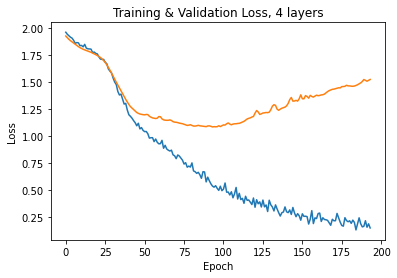

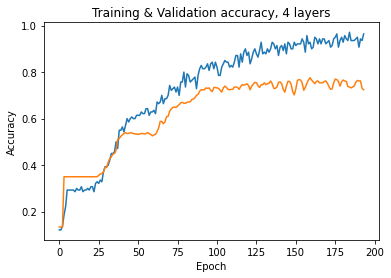

5 layers
Epoch: 0001 loss_train: 1.9092 acc_train: 0.2929 loss_val: 1.8595 acc_val: 0.3500 time: 0.0176s
Epoch: 0002 loss_train: 1.8946 acc_train: 0.2929 loss_val: 1.8509 acc_val: 0.3500 time: 0.0105s
Epoch: 0003 loss_train: 1.8812 acc_train: 0.2929 loss_val: 1.8429 acc_val: 0.3500 time: 0.0107s
Epoch: 0004 loss_train: 1.8824 acc_train: 0.2929 loss_val: 1.8357 acc_val: 0.3500 time: 0.0103s
Epoch: 0005 loss_train: 1.8755 acc_train: 0.2929 loss_val: 1.8300 acc_val: 0.3500 time: 0.0113s
Epoch: 0006 loss_train: 1.8618 acc_train: 0.2929 loss_val: 1.8244 acc_val: 0.3500 time: 0.0108s
Epoch: 0007 loss_train: 1.8442 acc_train: 0.2929 loss_val: 1.8190 acc_val: 0.3500 time: 0.0112s
Epoch: 0008 loss_train: 1.8437 acc_train: 0.2929 loss_val: 1.8138 acc_val: 0.3500 time: 0.0130s
Epoch: 0009 loss_train: 1.8385 acc_train: 0.2929 loss_val: 1.8092 acc_val: 0.3500 time: 0.0104s
Epoch: 0010 loss_train: 1.8200 acc_train: 0.2929 loss_val: 1.8056 acc_val: 0.3500 time: 0.0109s
Epoch: 0011 loss_train: 1.8536 

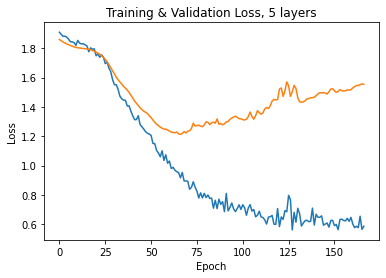

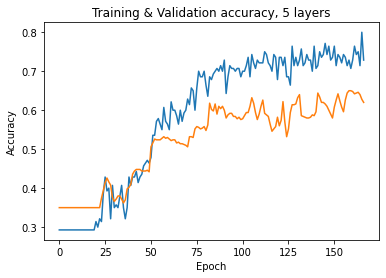

6 layers
Epoch: 0001 loss_train: 1.9306 acc_train: 0.1929 loss_val: 1.9273 acc_val: 0.1360 time: 0.0160s
Epoch: 0002 loss_train: 1.8941 acc_train: 0.2357 loss_val: 1.9084 acc_val: 0.1360 time: 0.0122s
Epoch: 0003 loss_train: 1.8967 acc_train: 0.1929 loss_val: 1.8931 acc_val: 0.1360 time: 0.0123s
Epoch: 0004 loss_train: 1.8713 acc_train: 0.1786 loss_val: 1.8812 acc_val: 0.1360 time: 0.0120s
Epoch: 0005 loss_train: 1.8592 acc_train: 0.2571 loss_val: 1.8716 acc_val: 0.1360 time: 0.0119s
Epoch: 0006 loss_train: 1.8597 acc_train: 0.2214 loss_val: 1.8631 acc_val: 0.3500 time: 0.0120s
Epoch: 0007 loss_train: 1.8597 acc_train: 0.2929 loss_val: 1.8565 acc_val: 0.3500 time: 0.0122s
Epoch: 0008 loss_train: 1.8542 acc_train: 0.2929 loss_val: 1.8515 acc_val: 0.3500 time: 0.0118s
Epoch: 0009 loss_train: 1.8465 acc_train: 0.2929 loss_val: 1.8488 acc_val: 0.3500 time: 0.0119s
Epoch: 0010 loss_train: 1.8451 acc_train: 0.3000 loss_val: 1.8462 acc_val: 0.3500 time: 0.0121s
Epoch: 0011 loss_train: 1.8353 

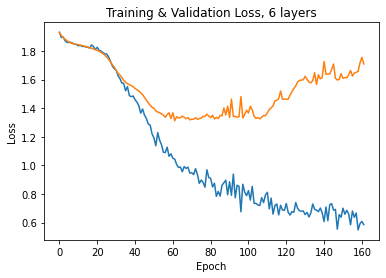

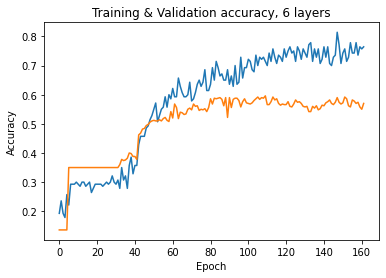

7 layers
Epoch: 0001 loss_train: 1.9979 acc_train: 0.1214 loss_val: 2.0054 acc_val: 0.1300 time: 0.0160s
Epoch: 0002 loss_train: 1.9866 acc_train: 0.1214 loss_val: 1.9870 acc_val: 0.1300 time: 0.0137s
Epoch: 0003 loss_train: 1.9542 acc_train: 0.1571 loss_val: 1.9703 acc_val: 0.1360 time: 0.0137s
Epoch: 0004 loss_train: 1.9396 acc_train: 0.2071 loss_val: 1.9542 acc_val: 0.1360 time: 0.0159s
Epoch: 0005 loss_train: 1.9247 acc_train: 0.1714 loss_val: 1.9384 acc_val: 0.1360 time: 0.0138s
Epoch: 0006 loss_train: 1.9128 acc_train: 0.1714 loss_val: 1.9231 acc_val: 0.1360 time: 0.0134s
Epoch: 0007 loss_train: 1.8835 acc_train: 0.2071 loss_val: 1.9089 acc_val: 0.1360 time: 0.0138s
Epoch: 0008 loss_train: 1.8780 acc_train: 0.1929 loss_val: 1.8946 acc_val: 0.1360 time: 0.0139s
Epoch: 0009 loss_train: 1.8779 acc_train: 0.2000 loss_val: 1.8806 acc_val: 0.1360 time: 0.0137s
Epoch: 0010 loss_train: 1.8791 acc_train: 0.2000 loss_val: 1.8668 acc_val: 0.1360 time: 0.0134s
Epoch: 0011 loss_train: 1.8746 

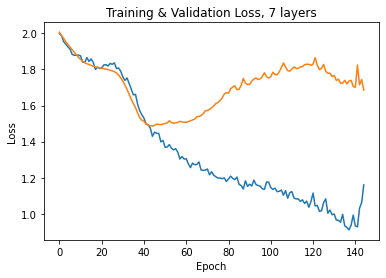

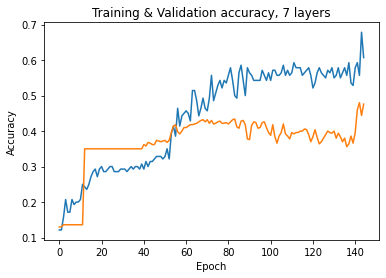

8 layers
Epoch: 0001 loss_train: 1.9661 acc_train: 0.0929 loss_val: 1.9180 acc_val: 0.0660 time: 0.0178s
Epoch: 0002 loss_train: 1.9336 acc_train: 0.0929 loss_val: 1.8995 acc_val: 0.3500 time: 0.0155s
Epoch: 0003 loss_train: 1.9120 acc_train: 0.2857 loss_val: 1.8845 acc_val: 0.3500 time: 0.0157s
Epoch: 0004 loss_train: 1.9098 acc_train: 0.2929 loss_val: 1.8730 acc_val: 0.3500 time: 0.0154s
Epoch: 0005 loss_train: 1.8757 acc_train: 0.2929 loss_val: 1.8655 acc_val: 0.3500 time: 0.0152s
Epoch: 0006 loss_train: 1.8858 acc_train: 0.2929 loss_val: 1.8595 acc_val: 0.3500 time: 0.0151s
Epoch: 0007 loss_train: 1.8638 acc_train: 0.2929 loss_val: 1.8534 acc_val: 0.3500 time: 0.0182s
Epoch: 0008 loss_train: 1.8668 acc_train: 0.2929 loss_val: 1.8479 acc_val: 0.3500 time: 0.0155s
Epoch: 0009 loss_train: 1.8667 acc_train: 0.2929 loss_val: 1.8425 acc_val: 0.3500 time: 0.0160s
Epoch: 0010 loss_train: 1.8569 acc_train: 0.2929 loss_val: 1.8380 acc_val: 0.3500 time: 0.0157s
Epoch: 0011 loss_train: 1.8520 

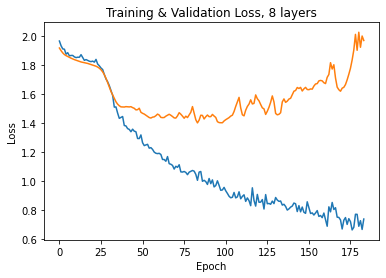

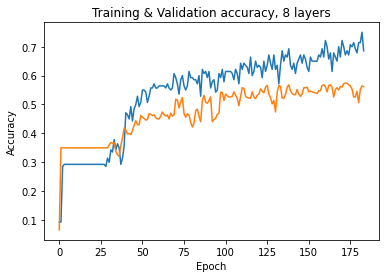

9 layers
Epoch: 0001 loss_train: 1.9057 acc_train: 0.2214 loss_val: 1.8601 acc_val: 0.3500 time: 0.0246s
Epoch: 0002 loss_train: 1.8867 acc_train: 0.2643 loss_val: 1.8461 acc_val: 0.3500 time: 0.0175s
Epoch: 0003 loss_train: 1.8975 acc_train: 0.2929 loss_val: 1.8371 acc_val: 0.3500 time: 0.0187s
Epoch: 0004 loss_train: 1.8668 acc_train: 0.2857 loss_val: 1.8284 acc_val: 0.3500 time: 0.0168s
Epoch: 0005 loss_train: 1.8377 acc_train: 0.2929 loss_val: 1.8199 acc_val: 0.3500 time: 0.0172s
Epoch: 0006 loss_train: 1.8505 acc_train: 0.2929 loss_val: 1.8124 acc_val: 0.3500 time: 0.0169s
Epoch: 0007 loss_train: 1.8492 acc_train: 0.2929 loss_val: 1.8062 acc_val: 0.3500 time: 0.0167s
Epoch: 0008 loss_train: 1.8592 acc_train: 0.2857 loss_val: 1.8032 acc_val: 0.3500 time: 0.0167s
Epoch: 0009 loss_train: 1.8436 acc_train: 0.2929 loss_val: 1.8023 acc_val: 0.3500 time: 0.0199s
Epoch: 0010 loss_train: 1.8244 acc_train: 0.2929 loss_val: 1.8024 acc_val: 0.3500 time: 0.0168s
Epoch: 0011 loss_train: 1.8231 

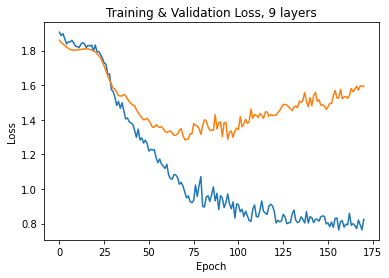

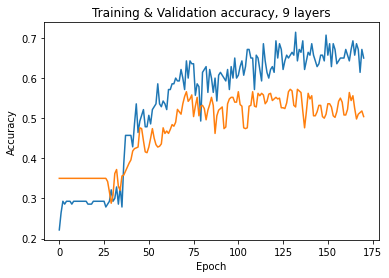

10 layers
Epoch: 0001 loss_train: 1.9348 acc_train: 0.1143 loss_val: 1.9191 acc_val: 0.1300 time: 0.0212s
Epoch: 0002 loss_train: 1.9161 acc_train: 0.1714 loss_val: 1.8995 acc_val: 0.3500 time: 0.0186s
Epoch: 0003 loss_train: 1.8858 acc_train: 0.2143 loss_val: 1.8827 acc_val: 0.3500 time: 0.0185s
Epoch: 0004 loss_train: 1.8814 acc_train: 0.2357 loss_val: 1.8665 acc_val: 0.3500 time: 0.0185s
Epoch: 0005 loss_train: 1.8728 acc_train: 0.2857 loss_val: 1.8509 acc_val: 0.3500 time: 0.0186s
Epoch: 0006 loss_train: 1.8621 acc_train: 0.2571 loss_val: 1.8369 acc_val: 0.3500 time: 0.0197s
Epoch: 0007 loss_train: 1.8261 acc_train: 0.3000 loss_val: 1.8258 acc_val: 0.3500 time: 0.0220s
Epoch: 0008 loss_train: 1.8293 acc_train: 0.3214 loss_val: 1.8201 acc_val: 0.3500 time: 0.0186s
Epoch: 0009 loss_train: 1.8554 acc_train: 0.2071 loss_val: 1.8190 acc_val: 0.3500 time: 0.0183s
Epoch: 0010 loss_train: 1.8526 acc_train: 0.2857 loss_val: 1.8178 acc_val: 0.3500 time: 0.0186s
Epoch: 0011 loss_train: 1.8196

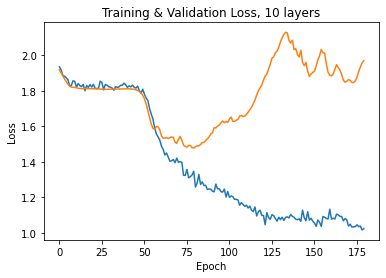

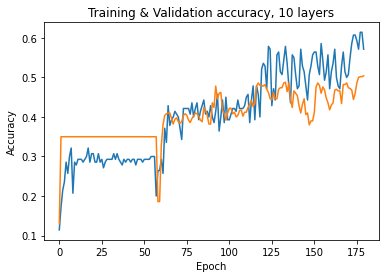

In [ ]:
# Training settings
EPOCHS = 900
LR = 0.01
WD = 0

for index, MODEL in enumerate(model_list):
  print(str(index+1)+" layers")
  np.random.seed(args.seed)
  torch.manual_seed(args.seed)
  if args.cuda:
      torch.cuda.manual_seed(args.seed)

  # Model and optimizer
  model = MODEL
  optimizer = optim.Adam(model.parameters(),
                        lr=LR, weight_decay=WD)
  if args.cuda:
    model.cuda()
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_train = idx_train.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()
      
  # initalize train/valid stats for plots
  loss_tr = []
  acc_tr = []
  loss_v = []
  acc_v = [] 
    
  # Define early stopping conditions
  min_val_loss = np.Inf
  n_epochs_stop = 100 # stop after 100 epochs of no improvement
  epochs_no_improve = 0

  # Train model
  t_total = time.time()
  for epoch in range(EPOCHS):
    # collect main stats after each epoch
    loss_train, acc_train, loss_val, acc_val = train(epoch) 

    # concatenate main stats after each epoch into separate lists (for plotting)
    loss_tr.append(loss_train) 
    acc_tr.append(acc_train) 
    loss_v.append(loss_val) 
    acc_v.append(acc_val) 

    # check for validation loss improvement
    if loss_val < min_val_loss:
    # Save the model of the epoch with the best loss so far
      model_name = 'gcn.pt'
      path = F"/content/drive/My Drive/DL/HW3/{model_name}" 
      # torch.save(model, path)
      torch.save(model.state_dict(), path)
      epochs_no_improve = 0 # set counter for epochs with no improvement to 0
      min_val_loss = loss_val
    else:
      epochs_no_improve += 1
      # print(epochs_no_improve)

    # Check early stopping condition
    if epochs_no_improve == n_epochs_stop:
      print('Early stopping!' )
      early_stop = True
      # break
    else:
      continue
    break
    if early_stop:
      print("Stopped")
      break
  print("Optimization Finished!")
  print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

  # Testing
  device = torch.device("cuda")
  model.load_state_dict(torch.load(path))
  model.to(device)
  test()
  # test(MODEL)

  plot_loss(train_loss=loss_tr, valid_loss=loss_v)
  plot_acc(train_acc=acc_tr, valid_acc=acc_v)

##### Using validation accuracy

In [ ]:
# define model instances

np.random.seed(args.seed)
torch.manual_seed(args.seed)

model1 = GCN1(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model2 = GCN2(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model3 = GCN3(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model4 = GCN4(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model5 = GCN5(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model6 = GCN6(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model7 = GCN7(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model8 = GCN8(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model9 = GCN9(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

model10 = GCN10(nfeat=features.shape[1], nhid=16,
            nclass=labels.max().item() + 1, dropout=args.dropout)

# create a list of models to iterate over
model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]

1 layers
Epoch: 0001 loss_train: 1.9674 acc_train: 0.1429 loss_val: 1.9800 acc_val: 0.1460 time: 0.0038s
Epoch: 0002 loss_train: 1.9537 acc_train: 0.2071 loss_val: 1.9698 acc_val: 0.1360 time: 0.0036s
Epoch: 0003 loss_train: 1.9401 acc_train: 0.2143 loss_val: 1.9599 acc_val: 0.1340 time: 0.0030s
Epoch: 0004 loss_train: 1.9267 acc_train: 0.2071 loss_val: 1.9500 acc_val: 0.1360 time: 0.0030s
Epoch: 0005 loss_train: 1.9135 acc_train: 0.2071 loss_val: 1.9403 acc_val: 0.1360 time: 0.0030s
Epoch: 0006 loss_train: 1.9004 acc_train: 0.2071 loss_val: 1.9307 acc_val: 0.1360 time: 0.0028s
Epoch: 0007 loss_train: 1.8875 acc_train: 0.2071 loss_val: 1.9213 acc_val: 0.1360 time: 0.0029s
Epoch: 0008 loss_train: 1.8748 acc_train: 0.2000 loss_val: 1.9121 acc_val: 0.1360 time: 0.0028s
Epoch: 0009 loss_train: 1.8623 acc_train: 0.2000 loss_val: 1.9030 acc_val: 0.1360 time: 0.0029s
Epoch: 0010 loss_train: 1.8499 acc_train: 0.2000 loss_val: 1.8941 acc_val: 0.1360 time: 0.0028s
Epoch: 0011 loss_train: 1.8377 

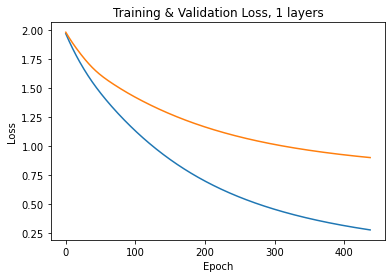

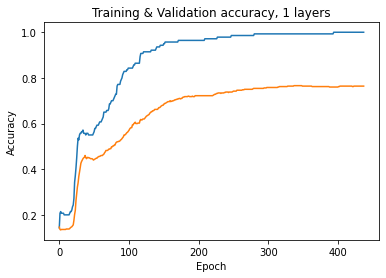

2 layers
Epoch: 0001 loss_train: 1.9649 acc_train: 0.2000 loss_val: 1.9936 acc_val: 0.1360 time: 0.0093s
Epoch: 0002 loss_train: 1.9455 acc_train: 0.1929 loss_val: 1.9748 acc_val: 0.1360 time: 0.0060s
Epoch: 0003 loss_train: 1.9393 acc_train: 0.2000 loss_val: 1.9571 acc_val: 0.1360 time: 0.0053s
Epoch: 0004 loss_train: 1.9253 acc_train: 0.1929 loss_val: 1.9401 acc_val: 0.1360 time: 0.0050s
Epoch: 0005 loss_train: 1.9040 acc_train: 0.2000 loss_val: 1.9238 acc_val: 0.1360 time: 0.0049s
Epoch: 0006 loss_train: 1.8915 acc_train: 0.2000 loss_val: 1.9083 acc_val: 0.1360 time: 0.0051s
Epoch: 0007 loss_train: 1.8799 acc_train: 0.2071 loss_val: 1.8934 acc_val: 0.1360 time: 0.0049s
Epoch: 0008 loss_train: 1.8781 acc_train: 0.2286 loss_val: 1.8794 acc_val: 0.1360 time: 0.0052s
Epoch: 0009 loss_train: 1.8597 acc_train: 0.2357 loss_val: 1.8661 acc_val: 0.2620 time: 0.0052s
Epoch: 0010 loss_train: 1.8412 acc_train: 0.3500 loss_val: 1.8535 acc_val: 0.4100 time: 0.0057s
Epoch: 0011 loss_train: 1.8343 

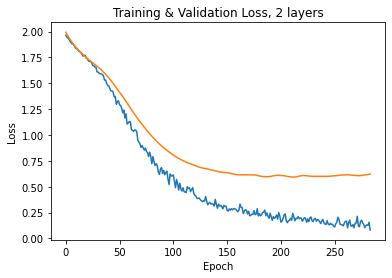

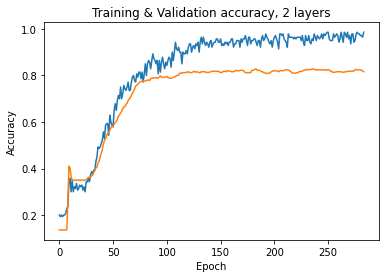

3 layers
Epoch: 0001 loss_train: 1.9344 acc_train: 0.1214 loss_val: 1.9165 acc_val: 0.1340 time: 0.0116s
Epoch: 0002 loss_train: 1.9232 acc_train: 0.1429 loss_val: 1.9041 acc_val: 0.1340 time: 0.0081s
Epoch: 0003 loss_train: 1.9113 acc_train: 0.1571 loss_val: 1.8929 acc_val: 0.1480 time: 0.0070s
Epoch: 0004 loss_train: 1.9016 acc_train: 0.1929 loss_val: 1.8825 acc_val: 0.1360 time: 0.0078s
Epoch: 0005 loss_train: 1.8849 acc_train: 0.3214 loss_val: 1.8723 acc_val: 0.1360 time: 0.0066s
Epoch: 0006 loss_train: 1.8807 acc_train: 0.2929 loss_val: 1.8625 acc_val: 0.1360 time: 0.0067s
Epoch: 0007 loss_train: 1.8716 acc_train: 0.2286 loss_val: 1.8524 acc_val: 0.1360 time: 0.0064s
Epoch: 0008 loss_train: 1.8557 acc_train: 0.2929 loss_val: 1.8423 acc_val: 0.2660 time: 0.0062s
Epoch: 0009 loss_train: 1.8538 acc_train: 0.2500 loss_val: 1.8330 acc_val: 0.4420 time: 0.0071s
Epoch: 0010 loss_train: 1.8207 acc_train: 0.3143 loss_val: 1.8236 acc_val: 0.4240 time: 0.0071s
Epoch: 0011 loss_train: 1.8484 

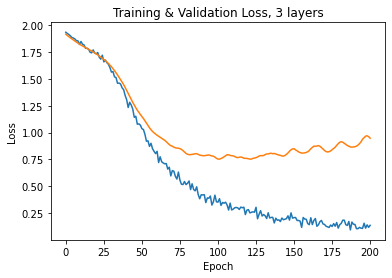

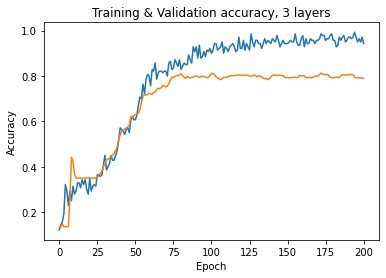

4 layers
Epoch: 0001 loss_train: 1.9620 acc_train: 0.1214 loss_val: 1.9271 acc_val: 0.1340 time: 0.0127s
Epoch: 0002 loss_train: 1.9426 acc_train: 0.1214 loss_val: 1.9107 acc_val: 0.1340 time: 0.0094s
Epoch: 0003 loss_train: 1.9292 acc_train: 0.1357 loss_val: 1.8960 acc_val: 0.1340 time: 0.0089s
Epoch: 0004 loss_train: 1.9157 acc_train: 0.1857 loss_val: 1.8834 acc_val: 0.3500 time: 0.0084s
Epoch: 0005 loss_train: 1.9071 acc_train: 0.2214 loss_val: 1.8724 acc_val: 0.3500 time: 0.0091s
Epoch: 0006 loss_train: 1.8862 acc_train: 0.2929 loss_val: 1.8612 acc_val: 0.3500 time: 0.0081s
Epoch: 0007 loss_train: 1.8589 acc_train: 0.2929 loss_val: 1.8500 acc_val: 0.3500 time: 0.0080s
Epoch: 0008 loss_train: 1.8663 acc_train: 0.2929 loss_val: 1.8391 acc_val: 0.3500 time: 0.0081s
Epoch: 0009 loss_train: 1.8637 acc_train: 0.2929 loss_val: 1.8289 acc_val: 0.3500 time: 0.0083s
Epoch: 0010 loss_train: 1.8376 acc_train: 0.2929 loss_val: 1.8193 acc_val: 0.3500 time: 0.0084s
Epoch: 0011 loss_train: 1.8398 

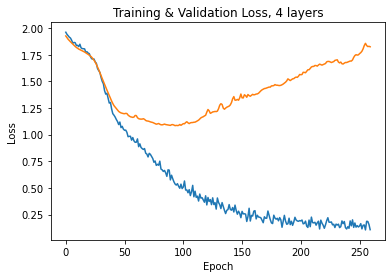

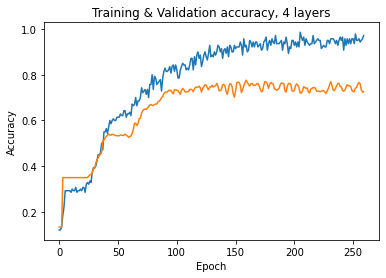

5 layers
Epoch: 0001 loss_train: 1.9092 acc_train: 0.2929 loss_val: 1.8595 acc_val: 0.3500 time: 0.0139s
Epoch: 0002 loss_train: 1.8946 acc_train: 0.2929 loss_val: 1.8509 acc_val: 0.3500 time: 0.0118s
Epoch: 0003 loss_train: 1.8812 acc_train: 0.2929 loss_val: 1.8429 acc_val: 0.3500 time: 0.0112s
Epoch: 0004 loss_train: 1.8824 acc_train: 0.2929 loss_val: 1.8357 acc_val: 0.3500 time: 0.0101s
Epoch: 0005 loss_train: 1.8755 acc_train: 0.2929 loss_val: 1.8300 acc_val: 0.3500 time: 0.0099s
Epoch: 0006 loss_train: 1.8618 acc_train: 0.2929 loss_val: 1.8244 acc_val: 0.3500 time: 0.0097s
Epoch: 0007 loss_train: 1.8442 acc_train: 0.2929 loss_val: 1.8190 acc_val: 0.3500 time: 0.0097s
Epoch: 0008 loss_train: 1.8437 acc_train: 0.2929 loss_val: 1.8138 acc_val: 0.3500 time: 0.0098s
Epoch: 0009 loss_train: 1.8385 acc_train: 0.2929 loss_val: 1.8092 acc_val: 0.3500 time: 0.0099s
Epoch: 0010 loss_train: 1.8200 acc_train: 0.2929 loss_val: 1.8056 acc_val: 0.3500 time: 0.0095s
Epoch: 0011 loss_train: 1.8536 

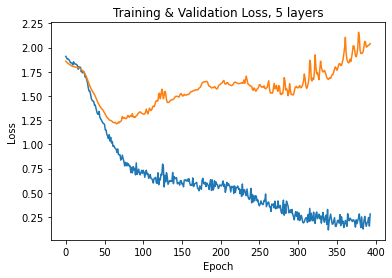

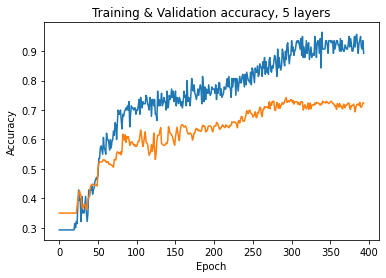

6 layers
Epoch: 0001 loss_train: 1.9306 acc_train: 0.1929 loss_val: 1.9273 acc_val: 0.1360 time: 0.0163s
Epoch: 0002 loss_train: 1.8941 acc_train: 0.2357 loss_val: 1.9084 acc_val: 0.1360 time: 0.0123s
Epoch: 0003 loss_train: 1.8967 acc_train: 0.1929 loss_val: 1.8931 acc_val: 0.1360 time: 0.0115s
Epoch: 0004 loss_train: 1.8713 acc_train: 0.1786 loss_val: 1.8812 acc_val: 0.1360 time: 0.0111s
Epoch: 0005 loss_train: 1.8592 acc_train: 0.2571 loss_val: 1.8716 acc_val: 0.1360 time: 0.0112s
Epoch: 0006 loss_train: 1.8597 acc_train: 0.2214 loss_val: 1.8631 acc_val: 0.3500 time: 0.0110s
Epoch: 0007 loss_train: 1.8597 acc_train: 0.2929 loss_val: 1.8565 acc_val: 0.3500 time: 0.0123s
Epoch: 0008 loss_train: 1.8542 acc_train: 0.2929 loss_val: 1.8515 acc_val: 0.3500 time: 0.0111s
Epoch: 0009 loss_train: 1.8465 acc_train: 0.2929 loss_val: 1.8488 acc_val: 0.3500 time: 0.0137s
Epoch: 0010 loss_train: 1.8451 acc_train: 0.3000 loss_val: 1.8462 acc_val: 0.3500 time: 0.0112s
Epoch: 0011 loss_train: 1.8353 

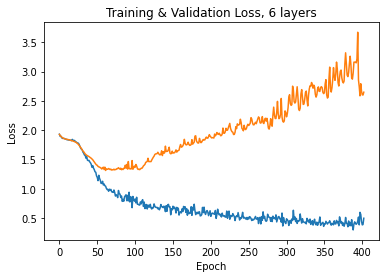

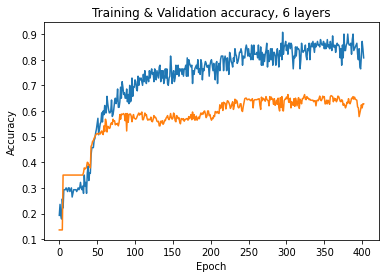

7 layers
Epoch: 0001 loss_train: 1.9979 acc_train: 0.1214 loss_val: 2.0054 acc_val: 0.1300 time: 0.0166s
Epoch: 0002 loss_train: 1.9866 acc_train: 0.1214 loss_val: 1.9870 acc_val: 0.1300 time: 0.0139s
Epoch: 0003 loss_train: 1.9542 acc_train: 0.1571 loss_val: 1.9703 acc_val: 0.1360 time: 0.0128s
Epoch: 0004 loss_train: 1.9396 acc_train: 0.2071 loss_val: 1.9542 acc_val: 0.1360 time: 0.0137s
Epoch: 0005 loss_train: 1.9247 acc_train: 0.1714 loss_val: 1.9384 acc_val: 0.1360 time: 0.0131s
Epoch: 0006 loss_train: 1.9128 acc_train: 0.1714 loss_val: 1.9231 acc_val: 0.1360 time: 0.0131s
Epoch: 0007 loss_train: 1.8835 acc_train: 0.2071 loss_val: 1.9089 acc_val: 0.1360 time: 0.0130s
Epoch: 0008 loss_train: 1.8780 acc_train: 0.1929 loss_val: 1.8946 acc_val: 0.1360 time: 0.0140s
Epoch: 0009 loss_train: 1.8779 acc_train: 0.2000 loss_val: 1.8806 acc_val: 0.1360 time: 0.0135s
Epoch: 0010 loss_train: 1.8791 acc_train: 0.2000 loss_val: 1.8668 acc_val: 0.1360 time: 0.0133s
Epoch: 0011 loss_train: 1.8746 

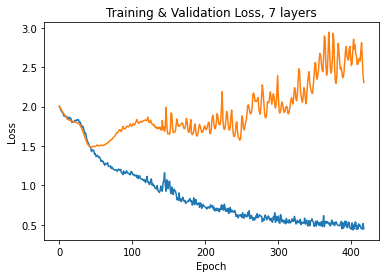

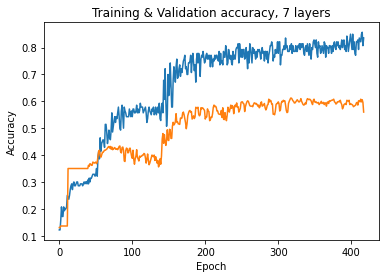

8 layers
Epoch: 0001 loss_train: 1.9661 acc_train: 0.0929 loss_val: 1.9180 acc_val: 0.0660 time: 0.0183s
Epoch: 0002 loss_train: 1.9336 acc_train: 0.0929 loss_val: 1.8995 acc_val: 0.3500 time: 0.0157s
Epoch: 0003 loss_train: 1.9120 acc_train: 0.2857 loss_val: 1.8845 acc_val: 0.3500 time: 0.0157s
Epoch: 0004 loss_train: 1.9098 acc_train: 0.2929 loss_val: 1.8730 acc_val: 0.3500 time: 0.0149s
Epoch: 0005 loss_train: 1.8757 acc_train: 0.2929 loss_val: 1.8655 acc_val: 0.3500 time: 0.0150s
Epoch: 0006 loss_train: 1.8858 acc_train: 0.2929 loss_val: 1.8595 acc_val: 0.3500 time: 0.0200s
Epoch: 0007 loss_train: 1.8638 acc_train: 0.2929 loss_val: 1.8534 acc_val: 0.3500 time: 0.0160s
Epoch: 0008 loss_train: 1.8668 acc_train: 0.2929 loss_val: 1.8479 acc_val: 0.3500 time: 0.0148s
Epoch: 0009 loss_train: 1.8667 acc_train: 0.2929 loss_val: 1.8425 acc_val: 0.3500 time: 0.0145s
Epoch: 0010 loss_train: 1.8569 acc_train: 0.2929 loss_val: 1.8380 acc_val: 0.3500 time: 0.0149s
Epoch: 0011 loss_train: 1.8520 

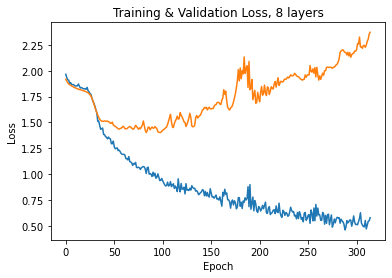

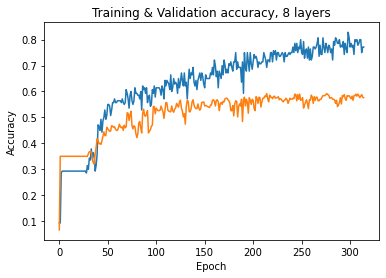

9 layers
Epoch: 0001 loss_train: 1.9057 acc_train: 0.2214 loss_val: 1.8601 acc_val: 0.3500 time: 0.0195s
Epoch: 0002 loss_train: 1.8867 acc_train: 0.2643 loss_val: 1.8461 acc_val: 0.3500 time: 0.0178s
Epoch: 0003 loss_train: 1.8975 acc_train: 0.2929 loss_val: 1.8371 acc_val: 0.3500 time: 0.0163s
Epoch: 0004 loss_train: 1.8668 acc_train: 0.2857 loss_val: 1.8284 acc_val: 0.3500 time: 0.0160s
Epoch: 0005 loss_train: 1.8377 acc_train: 0.2929 loss_val: 1.8199 acc_val: 0.3500 time: 0.0161s
Epoch: 0006 loss_train: 1.8505 acc_train: 0.2929 loss_val: 1.8124 acc_val: 0.3500 time: 0.0159s
Epoch: 0007 loss_train: 1.8492 acc_train: 0.2929 loss_val: 1.8062 acc_val: 0.3500 time: 0.0158s
Epoch: 0008 loss_train: 1.8592 acc_train: 0.2857 loss_val: 1.8032 acc_val: 0.3500 time: 0.0161s
Epoch: 0009 loss_train: 1.8436 acc_train: 0.2929 loss_val: 1.8023 acc_val: 0.3500 time: 0.0159s
Epoch: 0010 loss_train: 1.8244 acc_train: 0.2929 loss_val: 1.8024 acc_val: 0.3500 time: 0.0161s
Epoch: 0011 loss_train: 1.8231 

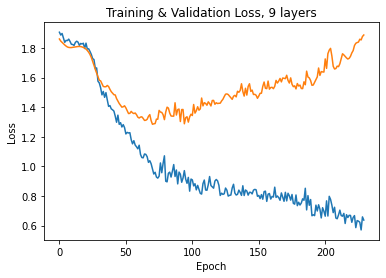

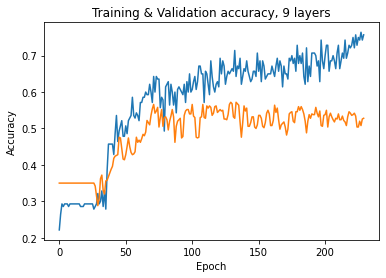

10 layers
Epoch: 0001 loss_train: 1.9348 acc_train: 0.1143 loss_val: 1.9191 acc_val: 0.1300 time: 0.0226s
Epoch: 0002 loss_train: 1.9161 acc_train: 0.1714 loss_val: 1.8995 acc_val: 0.3500 time: 0.0186s
Epoch: 0003 loss_train: 1.8858 acc_train: 0.2143 loss_val: 1.8827 acc_val: 0.3500 time: 0.0184s
Epoch: 0004 loss_train: 1.8814 acc_train: 0.2357 loss_val: 1.8665 acc_val: 0.3500 time: 0.0177s
Epoch: 0005 loss_train: 1.8728 acc_train: 0.2857 loss_val: 1.8509 acc_val: 0.3500 time: 0.0174s
Epoch: 0006 loss_train: 1.8621 acc_train: 0.2571 loss_val: 1.8369 acc_val: 0.3500 time: 0.0178s
Epoch: 0007 loss_train: 1.8261 acc_train: 0.3000 loss_val: 1.8258 acc_val: 0.3500 time: 0.0177s
Epoch: 0008 loss_train: 1.8293 acc_train: 0.3214 loss_val: 1.8201 acc_val: 0.3500 time: 0.0197s
Epoch: 0009 loss_train: 1.8554 acc_train: 0.2071 loss_val: 1.8190 acc_val: 0.3500 time: 0.0175s
Epoch: 0010 loss_train: 1.8526 acc_train: 0.2857 loss_val: 1.8178 acc_val: 0.3500 time: 0.0194s
Epoch: 0011 loss_train: 1.8196

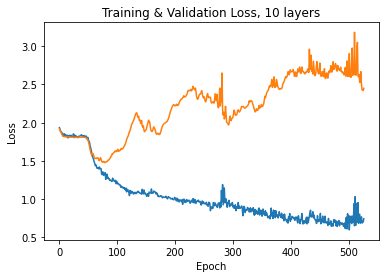

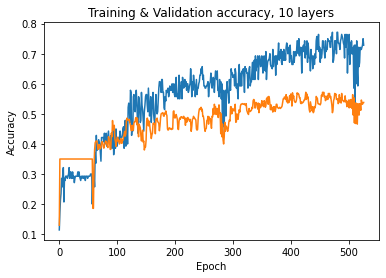

In [ ]:
# Training settings
EPOCHS = 900
LR = 0.01
WD = 0

for index, MODEL in enumerate(model_list):
  print(str(index+1)+" layers")
  np.random.seed(args.seed)
  torch.manual_seed(args.seed)
  if args.cuda:
      torch.cuda.manual_seed(args.seed)

  # Model and optimizer
  model = MODEL
  optimizer = optim.Adam(model.parameters(),
                        lr=LR, weight_decay=WD)
  if args.cuda:
    model.cuda()
    features = features.cuda()
    adj = adj.cuda()
    labels = labels.cuda()
    idx_train = idx_train.cuda()
    idx_val = idx_val.cuda()
    idx_test = idx_test.cuda()
      
  # initalize train/valid stats for plots
  loss_tr = []
  acc_tr = []
  loss_v = []
  acc_v = [] 
    
  # Define early stopping conditions
  max_val_acc = 0 # CHANGED
  n_epochs_stop = 100 # stop after 100 epochs of no improvement
  epochs_no_improve = 0

  # Train model
  t_total = time.time()
  for epoch in range(EPOCHS):
    # collect main stats after each epoch
    loss_train, acc_train, loss_val, acc_val = train(epoch) 

    # concatenate main stats after each epoch into separate lists (for plotting)
    loss_tr.append(loss_train) 
    acc_tr.append(acc_train) 
    loss_v.append(loss_val) 
    acc_v.append(acc_val) 

    # check for validation loss improvement
    if acc_val > max_val_acc:
    # Save the model of the epoch with the best loss so far
      model_name = 'gcn.pt'
      path = F"/content/drive/My Drive/DL/HW3/{model_name}" 
      # torch.save(model, path)
      torch.save(model.state_dict(), path)
      epochs_no_improve = 0 # set counter for epochs with no improvement to 0
      max_val_acc = acc_val
    else:
      epochs_no_improve += 1
      # print(epochs_no_improve)

    # Check early stopping condition
    if epochs_no_improve == n_epochs_stop:
      print('Early stopping!' )
      early_stop = True
      # break
    else:
      continue
    break
    if early_stop:
      print("Stopped")
      break
  print("Optimization Finished!")
  print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

  # Testing
  device = torch.device("cuda")
  model.load_state_dict(torch.load(path))
  model.to(device)
  test()
  # test(MODEL)

  plot_loss(train_loss=loss_tr, valid_loss=loss_v)
  plot_acc(train_acc=acc_tr, valid_acc=acc_v)   


### 3) Performance w.r.t. the hidden dimension

Another important hyperparameter for graph neural networks is the dimension of hidden layers. In this part, you need to try different dimensions for the hidden layers, and further fill in the table below.

**Response**: To fill in the table below, we trained each model until it reached its best validation loss and then used it to score the test set. It should be noted that we could not reproduce the same results from session to session, however, withing one session, the results were reproducible. If you run the code below, the results won't be the same.

|                                     | 4     | 8     | 16    | 32    | 64    | 128   | Hyperparameters         |
|---------------------------------------|-------|-------|-------|-------|-------|-------|-------------------------|
| Faster learning, with weight decay    | 56.6% | 71.7% | 76.0% | 77.3% | 76.9% | 76.6% | lr = 0.05, wd = 0.00001 |
| Faster learning, without weight decay | 51.9% | 73.9% | 74.2% | 74.9% | 75.5% | 75.9% | lr = 0.05, wd = 0       |
|                                       |       |       |       |       |       |       |                         |
| Slower learning, with weight decay    | 72.3% | 73.4% | 75.5% | 76.3% | 74.9% | 75.6% | lr = 0.01, wd = 0.0001  |
| Slower learning, without weight decay | 50.6% | 72.5% | 74.7% | 75.3% | 76.0% | 77.2% | lr = 0.01, wd = 0       |



Given the above result, please write down your observation and the potential reason based on your understanding.

**Observations:** Depending on the hyperparameters used, we may get different trajectory for the test accuracy. When we used weight decay, we observed test accuracy peaking at 32 hidden units. The table above shows just one run of each model, in other models we sometimes observed peak at 16 hidden dimensions. 

When we did not use weigtht decay, the test accuracy tended to grow with the increasing hidden dimensions. Overall, we might say that after about 32 hidden hidden dimensions, test accuracy is quite stable, and growing hidden dimensions either decrease it or don't improve it much. 

**Reasons:** The generalization capacity of a model depends on its capacity. When capacity is lower than needed, underfitting occurs (which is observed with low hidden dimensions like 4 and 8). When capacity is higher than necessary, overfitting occurs, which is likely happening after 32 dimensions in models with weight decay. In our case, models with 16-32 hidden dimensions and weight decay strike a good balance between under- and overfitting, thus resulting in a decent test accuracy. 

In [ ]:
class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj): # x - features, adj - adjacency matrix
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        # return F.log_softmax(x, dim=1) # if we use negative log-lik
        return x # if we want to use cross-entropy loss

#### With early stopping by min valid loss

Number of epochs without improvement allowed = 50.

A model with the **lowest valid. loss** used to score test data set.

Training two scenarios:

1.   900 epochs max, LR = 0.01, WD = 1e-4
2.   200 epochs max, LR = 0.05, WD = 1e-5

###### With weight decay

In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
output_dir = './drive/My Drive/DL/HW3/' 

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

4  hidden dimensions
Epoch: 0001 loss_train: 1.9160 acc_train: 0.2429 loss_val: 1.9079 acc_val: 0.1360 time: 0.0095s
Epoch: 0002 loss_train: 1.9098 acc_train: 0.2143 loss_val: 1.9017 acc_val: 0.1360 time: 0.0070s
Epoch: 0003 loss_train: 1.8982 acc_train: 0.2714 loss_val: 1.8958 acc_val: 0.1360 time: 0.0070s
Epoch: 0004 loss_train: 1.8935 acc_train: 0.2214 loss_val: 1.8902 acc_val: 0.1360 time: 0.0069s
Epoch: 0005 loss_train: 1.8881 acc_train: 0.2500 loss_val: 1.8849 acc_val: 0.1360 time: 0.0068s
Epoch: 0006 loss_train: 1.8825 acc_train: 0.2071 loss_val: 1.8796 acc_val: 0.1380 time: 0.0068s
Epoch: 0007 loss_train: 1.8748 acc_train: 0.2286 loss_val: 1.8746 acc_val: 0.1480 time: 0.0071s
Epoch: 0008 loss_train: 1.8682 acc_train: 0.2571 loss_val: 1.8696 acc_val: 0.2320 time: 0.0069s
Epoch: 0009 loss_train: 1.8710 acc_train: 0.2143 loss_val: 1.8648 acc_val: 0.3640 time: 0.0069s
Epoch: 0010 loss_train: 1.8639 acc_train: 0.2643 loss_val: 1.8600 acc_val: 0.3500 time: 0.0067s
Epoch: 0011 loss_tr

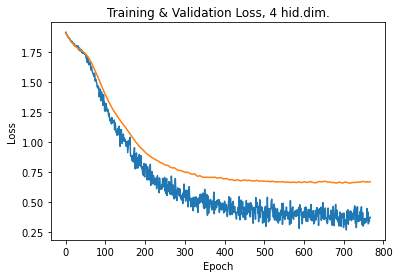

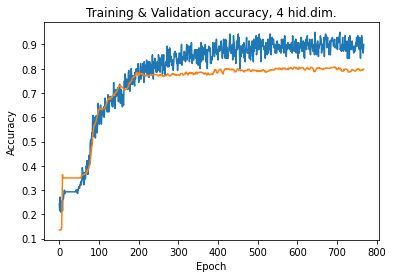

8  hidden dimensions
Epoch: 0001 loss_train: 2.0352 acc_train: 0.1429 loss_val: 2.0184 acc_val: 0.1340 time: 0.0086s
Epoch: 0002 loss_train: 2.0162 acc_train: 0.1143 loss_val: 2.0057 acc_val: 0.1340 time: 0.0066s
Epoch: 0003 loss_train: 1.9929 acc_train: 0.1429 loss_val: 1.9934 acc_val: 0.1340 time: 0.0067s
Epoch: 0004 loss_train: 1.9814 acc_train: 0.1429 loss_val: 1.9814 acc_val: 0.1340 time: 0.0066s
Epoch: 0005 loss_train: 1.9738 acc_train: 0.1214 loss_val: 1.9698 acc_val: 0.1340 time: 0.0065s
Epoch: 0006 loss_train: 1.9589 acc_train: 0.1500 loss_val: 1.9582 acc_val: 0.1340 time: 0.0067s
Epoch: 0007 loss_train: 1.9438 acc_train: 0.1143 loss_val: 1.9468 acc_val: 0.1380 time: 0.0064s
Epoch: 0008 loss_train: 1.9311 acc_train: 0.1286 loss_val: 1.9355 acc_val: 0.1400 time: 0.0066s
Epoch: 0009 loss_train: 1.9243 acc_train: 0.1929 loss_val: 1.9242 acc_val: 0.1560 time: 0.0066s
Epoch: 0010 loss_train: 1.9018 acc_train: 0.2500 loss_val: 1.9128 acc_val: 0.1700 time: 0.0066s
Epoch: 0011 loss_tr

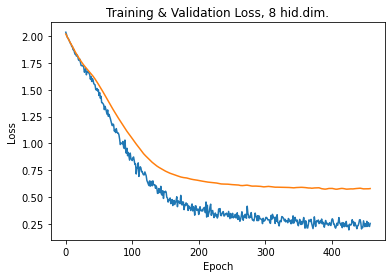

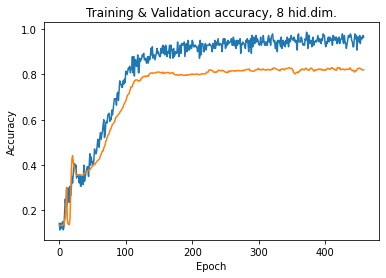

16  hidden dimensions
Epoch: 0001 loss_train: 1.9517 acc_train: 0.2143 loss_val: 1.9498 acc_val: 0.1360 time: 0.0078s
Epoch: 0002 loss_train: 1.9478 acc_train: 0.2000 loss_val: 1.9381 acc_val: 0.1360 time: 0.0066s
Epoch: 0003 loss_train: 1.9242 acc_train: 0.2000 loss_val: 1.9266 acc_val: 0.1360 time: 0.0058s
Epoch: 0004 loss_train: 1.9231 acc_train: 0.2000 loss_val: 1.9152 acc_val: 0.1360 time: 0.0058s
Epoch: 0005 loss_train: 1.9034 acc_train: 0.2000 loss_val: 1.9039 acc_val: 0.1360 time: 0.0056s
Epoch: 0006 loss_train: 1.8835 acc_train: 0.2143 loss_val: 1.8930 acc_val: 0.1360 time: 0.0056s
Epoch: 0007 loss_train: 1.8716 acc_train: 0.2143 loss_val: 1.8821 acc_val: 0.1360 time: 0.0061s
Epoch: 0008 loss_train: 1.8561 acc_train: 0.2214 loss_val: 1.8714 acc_val: 0.1360 time: 0.0079s
Epoch: 0009 loss_train: 1.8516 acc_train: 0.2571 loss_val: 1.8608 acc_val: 0.1360 time: 0.0056s
Epoch: 0010 loss_train: 1.8474 acc_train: 0.2643 loss_val: 1.8506 acc_val: 0.1560 time: 0.0057s
Epoch: 0011 loss_t

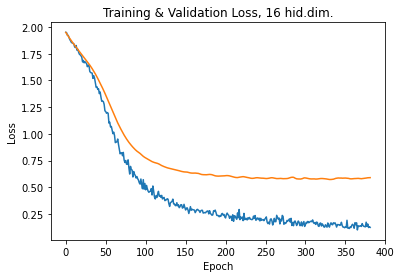

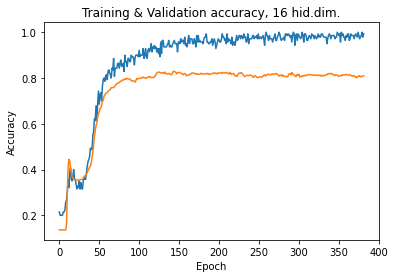

32  hidden dimensions
Epoch: 0001 loss_train: 1.9774 acc_train: 0.0571 loss_val: 1.9592 acc_val: 0.0660 time: 0.0066s
Epoch: 0002 loss_train: 1.9567 acc_train: 0.0571 loss_val: 1.9392 acc_val: 0.0660 time: 0.0058s
Epoch: 0003 loss_train: 1.9301 acc_train: 0.0571 loss_val: 1.9217 acc_val: 0.0800 time: 0.0056s
Epoch: 0004 loss_train: 1.9113 acc_train: 0.1214 loss_val: 1.9063 acc_val: 0.1680 time: 0.0056s
Epoch: 0005 loss_train: 1.8966 acc_train: 0.3143 loss_val: 1.8931 acc_val: 0.3320 time: 0.0058s
Epoch: 0006 loss_train: 1.8826 acc_train: 0.3143 loss_val: 1.8811 acc_val: 0.4320 time: 0.0056s
Epoch: 0007 loss_train: 1.8718 acc_train: 0.3571 loss_val: 1.8697 acc_val: 0.4400 time: 0.0056s
Epoch: 0008 loss_train: 1.8589 acc_train: 0.4000 loss_val: 1.8591 acc_val: 0.4380 time: 0.0057s
Epoch: 0009 loss_train: 1.8442 acc_train: 0.4286 loss_val: 1.8489 acc_val: 0.4460 time: 0.0056s
Epoch: 0010 loss_train: 1.8232 acc_train: 0.4000 loss_val: 1.8384 acc_val: 0.4580 time: 0.0056s
Epoch: 0011 loss_t

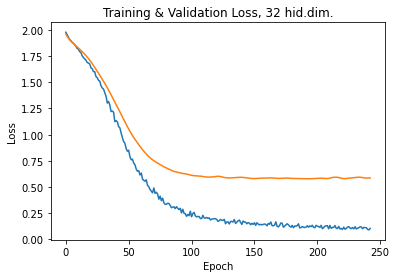

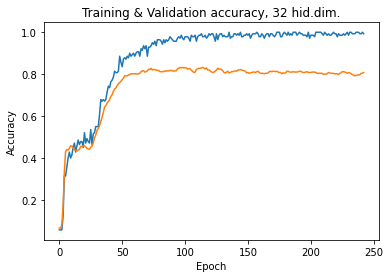

64  hidden dimensions
Epoch: 0001 loss_train: 2.0694 acc_train: 0.1071 loss_val: 2.0194 acc_val: 0.1060 time: 0.0065s
Epoch: 0002 loss_train: 2.0237 acc_train: 0.1071 loss_val: 1.9721 acc_val: 0.1060 time: 0.0058s
Epoch: 0003 loss_train: 1.9621 acc_train: 0.1071 loss_val: 1.9280 acc_val: 0.1060 time: 0.0060s
Epoch: 0004 loss_train: 1.9124 acc_train: 0.1000 loss_val: 1.8865 acc_val: 0.1060 time: 0.0054s
Epoch: 0005 loss_train: 1.8723 acc_train: 0.1143 loss_val: 1.8472 acc_val: 0.3660 time: 0.0057s
Epoch: 0006 loss_train: 1.8329 acc_train: 0.3500 loss_val: 1.8104 acc_val: 0.4060 time: 0.0057s
Epoch: 0007 loss_train: 1.7824 acc_train: 0.4571 loss_val: 1.7761 acc_val: 0.3840 time: 0.0060s
Epoch: 0008 loss_train: 1.7548 acc_train: 0.4214 loss_val: 1.7442 acc_val: 0.3820 time: 0.0058s
Epoch: 0009 loss_train: 1.7046 acc_train: 0.3929 loss_val: 1.7159 acc_val: 0.3820 time: 0.0057s
Epoch: 0010 loss_train: 1.6669 acc_train: 0.4286 loss_val: 1.6917 acc_val: 0.3840 time: 0.0056s
Epoch: 0011 loss_t

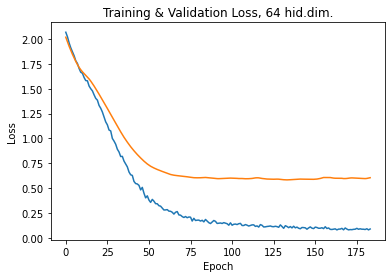

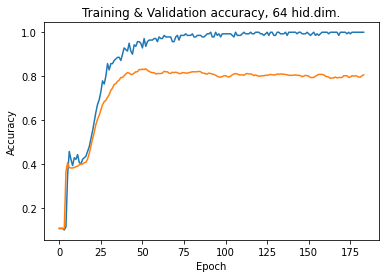

128  hidden dimensions
Epoch: 0001 loss_train: 1.9798 acc_train: 0.1214 loss_val: 1.9090 acc_val: 0.1340 time: 0.0059s
Epoch: 0002 loss_train: 1.8970 acc_train: 0.1286 loss_val: 1.8543 acc_val: 0.2420 time: 0.0073s
Epoch: 0003 loss_train: 1.8283 acc_train: 0.3571 loss_val: 1.8069 acc_val: 0.3880 time: 0.0073s
Epoch: 0004 loss_train: 1.7589 acc_train: 0.5143 loss_val: 1.7664 acc_val: 0.4380 time: 0.0063s
Epoch: 0005 loss_train: 1.7090 acc_train: 0.4357 loss_val: 1.7310 acc_val: 0.4540 time: 0.0068s
Epoch: 0006 loss_train: 1.6652 acc_train: 0.4857 loss_val: 1.6955 acc_val: 0.4440 time: 0.0062s
Epoch: 0007 loss_train: 1.6174 acc_train: 0.4643 loss_val: 1.6597 acc_val: 0.4080 time: 0.0063s
Epoch: 0008 loss_train: 1.5824 acc_train: 0.4643 loss_val: 1.6246 acc_val: 0.4000 time: 0.0063s
Epoch: 0009 loss_train: 1.5086 acc_train: 0.4643 loss_val: 1.5886 acc_val: 0.4000 time: 0.0062s
Epoch: 0010 loss_train: 1.4813 acc_train: 0.4643 loss_val: 1.5502 acc_val: 0.4060 time: 0.0063s
Epoch: 0011 loss_

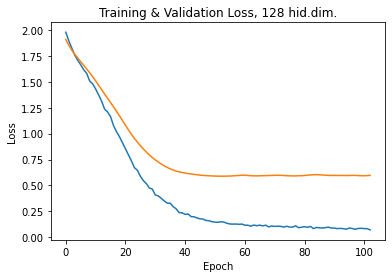

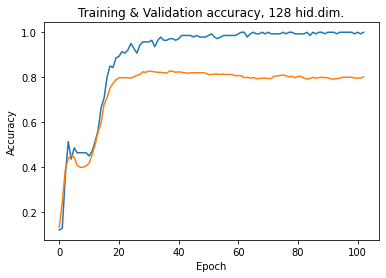

In [ ]:
# Training settings
EPOCHS = 900
LR = 0.01
WD = 1e-4
hid_dim = [4,8,16,32,64,128]

for i in hid_dim:
  print(i, " hidden dimensions")
  args.cuda = not args.no_cuda and torch.cuda.is_available()

  np.random.seed(args.seed)
  torch.manual_seed(args.seed)
  if args.cuda:
      torch.cuda.manual_seed(args.seed)

  # Model and optimizer
  model = GCN(nfeat=features.shape[1],
              nhid=i,
              nclass=labels.max().item() + 1,
              dropout=args.dropout)
  optimizer = optim.Adam(model.parameters(),
                        lr=LR, weight_decay=WD)
  if args.cuda:
      model.cuda()
      features = features.cuda()
      adj = adj.cuda()
      labels = labels.cuda()
      idx_train = idx_train.cuda()
      idx_val = idx_val.cuda()
      idx_test = idx_test.cuda()
      
  # collect train/valid stats for plots
  loss_tr = []
  acc_tr = []
  loss_v = []
  acc_v = []

  def train(epoch):
      t = time.time()
      model.train()
      optimizer.zero_grad()
      output = model(features, adj)
      # loss_train = F.nll_loss(output[idx_train], labels[idx_train])
      loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
      acc_train = accuracy(output[idx_train], labels[idx_train])

      loss_tr.append(loss_train) # collect train loss
      acc_tr.append(acc_train) # collect train accuracy

      loss_train.backward()
      optimizer.step()

      if not args.fastmode:
          # Evaluate validation set performance separately,
          # deactivates dropout during validation run.
          model.eval()
          output = model(features, adj)

      # loss_val = F.nll_loss(output[idx_val], labels[idx_val])
      loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
      acc_val = accuracy(output[idx_val], labels[idx_val])

      loss_v.append(loss_val) # collect train loss
      acc_v.append(acc_val) # collect train accuracy

      print('Epoch: {:04d}'.format(epoch+1),
            'loss_train: {:.4f}'.format(loss_train.item()),
            'acc_train: {:.4f}'.format(acc_train.item()),
            'loss_val: {:.4f}'.format(loss_val.item()),
            'acc_val: {:.4f}'.format(acc_val.item()),
            'time: {:.4f}s'.format(time.time() - t))
      return loss_val.item()

  def test():
    model = GCN(nfeat=features.shape[1],
                nhid=i,
                nclass=labels.max().item() + 1,
                dropout=args.dropout)
    device = torch.device("cuda")
    model.load_state_dict(torch.load(path))
    model.to(device)
    model.eval()
    output = model(features, adj)
    # loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

  # Define early stopping conditions
  min_val_loss = np.Inf
  n_epochs_stop = 50 # stop after 50 epochs of no improvement
  epochs_no_improve = 0
  
  # Train model
  t_total = time.time()
  for epoch in range(EPOCHS):
      val_loss = train(epoch) # save validation loss after an epoch
      
      # check for validation loss improvement
      if val_loss < min_val_loss:
      # Save the model of the epoch with the best loss
        model_name = 'gcn.pt'
        path = F"/content/drive/My Drive/DL/HW3/{model_name}" 
        torch.save(model.state_dict(), path)
        epochs_no_improve = 0 # set epoch counter with no improvement to 0
        min_val_loss = val_loss
        # print(min_val_loss)
      else:
        epochs_no_improve += 1
        # print(epochs_no_improve)

      # Check early stopping condition
      if epochs_no_improve == n_epochs_stop:
        print('Early stopping!' )
        early_stop = True
        # break
      else:
        continue
      break
      if early_stop:
          print("Stopped")
          break
  print("Optimization Finished!")
  print("Total time elapsed: {:.4f}s".format(time.time() - t_total))



  # Testing
  test()

  # Plot train and valid loss
  plt.plot(loss_tr, label="Train loss")
  plt.plot(loss_v, label="Validation loss")
  plt.title("Training & Validation Loss, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

  # Plot train and valid accuracy
  plt.plot(acc_tr, label="Train accuracy")
  plt.plot(acc_v, label="Validation accuracy")
  plt.title("Training & Validation accuracy, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.show()

4  hidden dimensions
Epoch: 0001 loss_train: 1.9160 acc_train: 0.2429 loss_val: 1.8843 acc_val: 0.1360 time: 0.0059s
Epoch: 0002 loss_train: 1.8841 acc_train: 0.2214 loss_val: 1.8595 acc_val: 0.3800 time: 0.0060s
Epoch: 0003 loss_train: 1.8554 acc_train: 0.3214 loss_val: 1.8383 acc_val: 0.3500 time: 0.0058s
Epoch: 0004 loss_train: 1.8346 acc_train: 0.2929 loss_val: 1.8190 acc_val: 0.3500 time: 0.0057s
Epoch: 0005 loss_train: 1.8145 acc_train: 0.2929 loss_val: 1.8013 acc_val: 0.3500 time: 0.0058s
Epoch: 0006 loss_train: 1.8075 acc_train: 0.2929 loss_val: 1.7870 acc_val: 0.3500 time: 0.0060s
Epoch: 0007 loss_train: 1.7780 acc_train: 0.2929 loss_val: 1.7753 acc_val: 0.3500 time: 0.0058s
Epoch: 0008 loss_train: 1.7742 acc_train: 0.2929 loss_val: 1.7660 acc_val: 0.3500 time: 0.0056s
Epoch: 0009 loss_train: 1.7903 acc_train: 0.2929 loss_val: 1.7580 acc_val: 0.3500 time: 0.0058s
Epoch: 0010 loss_train: 1.7640 acc_train: 0.2929 loss_val: 1.7499 acc_val: 0.3500 time: 0.0057s
Epoch: 0011 loss_tr

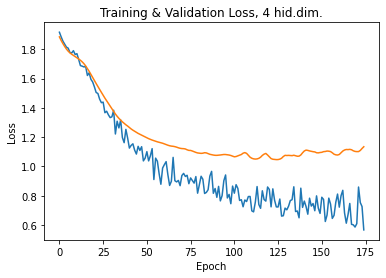

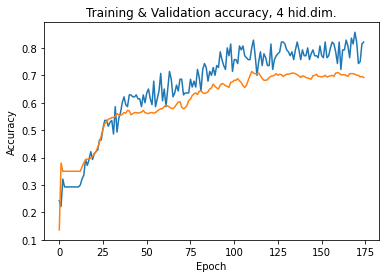

8  hidden dimensions
Epoch: 0001 loss_train: 2.0352 acc_train: 0.1429 loss_val: 1.9714 acc_val: 0.1340 time: 0.0087s
Epoch: 0002 loss_train: 1.9606 acc_train: 0.1214 loss_val: 1.9194 acc_val: 0.1500 time: 0.0068s
Epoch: 0003 loss_train: 1.8899 acc_train: 0.2571 loss_val: 1.8668 acc_val: 0.1360 time: 0.0067s
Epoch: 0004 loss_train: 1.8243 acc_train: 0.2286 loss_val: 1.8205 acc_val: 0.1360 time: 0.0066s
Epoch: 0005 loss_train: 1.7890 acc_train: 0.2643 loss_val: 1.7851 acc_val: 0.3840 time: 0.0080s
Epoch: 0006 loss_train: 1.7486 acc_train: 0.3286 loss_val: 1.7541 acc_val: 0.3880 time: 0.0066s
Epoch: 0007 loss_train: 1.7291 acc_train: 0.4071 loss_val: 1.7278 acc_val: 0.3560 time: 0.0067s
Epoch: 0008 loss_train: 1.7163 acc_train: 0.3500 loss_val: 1.6992 acc_val: 0.3500 time: 0.0068s
Epoch: 0009 loss_train: 1.6857 acc_train: 0.3214 loss_val: 1.6655 acc_val: 0.3500 time: 0.0068s
Epoch: 0010 loss_train: 1.6391 acc_train: 0.3286 loss_val: 1.6284 acc_val: 0.3520 time: 0.0067s
Epoch: 0011 loss_tr

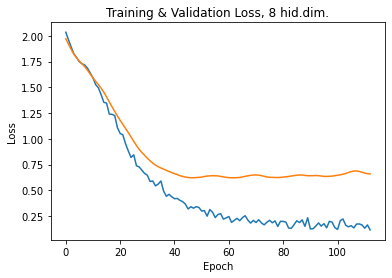

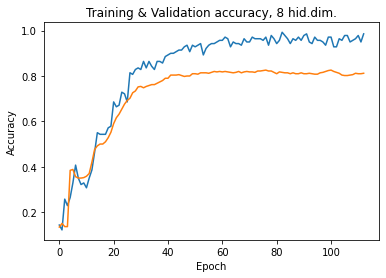

16  hidden dimensions
Epoch: 0001 loss_train: 1.9517 acc_train: 0.2143 loss_val: 1.9012 acc_val: 0.1360 time: 0.0081s
Epoch: 0002 loss_train: 1.8957 acc_train: 0.2000 loss_val: 1.8504 acc_val: 0.1380 time: 0.0056s
Epoch: 0003 loss_train: 1.8278 acc_train: 0.3571 loss_val: 1.8019 acc_val: 0.4200 time: 0.0057s
Epoch: 0004 loss_train: 1.7971 acc_train: 0.3643 loss_val: 1.7605 acc_val: 0.3520 time: 0.0056s
Epoch: 0005 loss_train: 1.7339 acc_train: 0.3286 loss_val: 1.7236 acc_val: 0.3500 time: 0.0055s
Epoch: 0006 loss_train: 1.6962 acc_train: 0.3071 loss_val: 1.6906 acc_val: 0.3500 time: 0.0055s
Epoch: 0007 loss_train: 1.6456 acc_train: 0.3000 loss_val: 1.6527 acc_val: 0.3520 time: 0.0057s
Epoch: 0008 loss_train: 1.5885 acc_train: 0.3143 loss_val: 1.6081 acc_val: 0.3660 time: 0.0056s
Epoch: 0009 loss_train: 1.5334 acc_train: 0.4357 loss_val: 1.5609 acc_val: 0.4240 time: 0.0055s
Epoch: 0010 loss_train: 1.4777 acc_train: 0.4714 loss_val: 1.5042 acc_val: 0.5280 time: 0.0056s
Epoch: 0011 loss_t

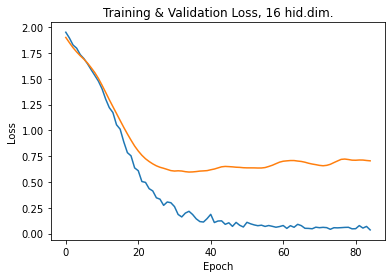

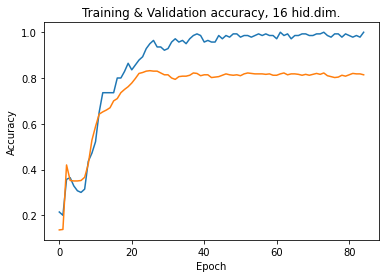

32  hidden dimensions
Epoch: 0001 loss_train: 1.9774 acc_train: 0.0571 loss_val: 1.8935 acc_val: 0.3640 time: 0.0071s
Epoch: 0002 loss_train: 1.8926 acc_train: 0.3214 loss_val: 1.8516 acc_val: 0.4040 time: 0.0066s
Epoch: 0003 loss_train: 1.8366 acc_train: 0.3714 loss_val: 1.8129 acc_val: 0.4440 time: 0.0057s
Epoch: 0004 loss_train: 1.7800 acc_train: 0.4429 loss_val: 1.7719 acc_val: 0.4460 time: 0.0068s
Epoch: 0005 loss_train: 1.7371 acc_train: 0.4429 loss_val: 1.7243 acc_val: 0.4360 time: 0.0059s
Epoch: 0006 loss_train: 1.6795 acc_train: 0.4357 loss_val: 1.6599 acc_val: 0.3980 time: 0.0065s
Epoch: 0007 loss_train: 1.6033 acc_train: 0.4071 loss_val: 1.5845 acc_val: 0.3840 time: 0.0058s
Epoch: 0008 loss_train: 1.5066 acc_train: 0.4143 loss_val: 1.5031 acc_val: 0.4060 time: 0.0056s
Epoch: 0009 loss_train: 1.3790 acc_train: 0.5500 loss_val: 1.4216 acc_val: 0.5320 time: 0.0056s
Epoch: 0010 loss_train: 1.2426 acc_train: 0.6214 loss_val: 1.3367 acc_val: 0.6420 time: 0.0070s
Epoch: 0011 loss_t

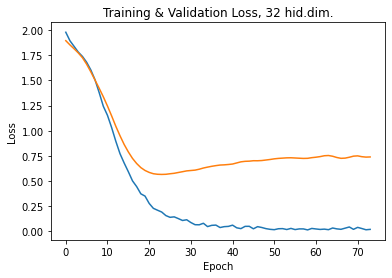

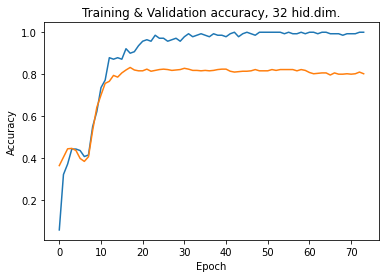

64  hidden dimensions
Epoch: 0001 loss_train: 2.0694 acc_train: 0.1071 loss_val: 1.8523 acc_val: 0.4140 time: 0.0060s
Epoch: 0002 loss_train: 1.8480 acc_train: 0.2929 loss_val: 1.7189 acc_val: 0.3660 time: 0.0081s
Epoch: 0003 loss_train: 1.6800 acc_train: 0.3786 loss_val: 1.6851 acc_val: 0.3720 time: 0.0075s
Epoch: 0004 loss_train: 1.6051 acc_train: 0.4071 loss_val: 1.6184 acc_val: 0.4300 time: 0.0068s
Epoch: 0005 loss_train: 1.5062 acc_train: 0.4643 loss_val: 1.5005 acc_val: 0.4740 time: 0.0089s
Epoch: 0006 loss_train: 1.3480 acc_train: 0.5357 loss_val: 1.3749 acc_val: 0.5960 time: 0.0068s
Epoch: 0007 loss_train: 1.1746 acc_train: 0.6786 loss_val: 1.2540 acc_val: 0.6640 time: 0.0068s
Epoch: 0008 loss_train: 1.0289 acc_train: 0.8214 loss_val: 1.1317 acc_val: 0.7540 time: 0.0069s
Epoch: 0009 loss_train: 0.8683 acc_train: 0.8714 loss_val: 1.0201 acc_val: 0.7940 time: 0.0068s
Epoch: 0010 loss_train: 0.7172 acc_train: 0.9286 loss_val: 0.9119 acc_val: 0.8240 time: 0.0068s
Epoch: 0011 loss_t

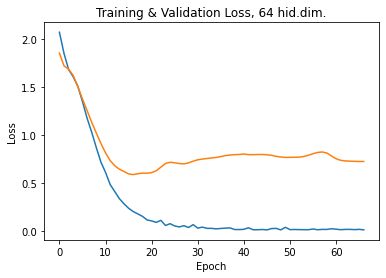

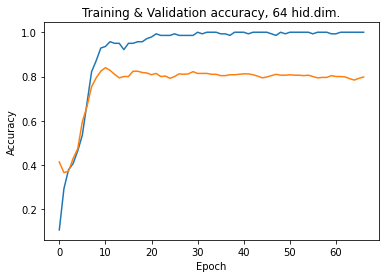

128  hidden dimensions
Epoch: 0001 loss_train: 1.9798 acc_train: 0.1214 loss_val: 1.7786 acc_val: 0.1860 time: 0.0078s
Epoch: 0002 loss_train: 1.7230 acc_train: 0.3143 loss_val: 1.6462 acc_val: 0.3560 time: 0.0067s
Epoch: 0003 loss_train: 1.5644 acc_train: 0.3071 loss_val: 1.4902 acc_val: 0.4220 time: 0.0066s
Epoch: 0004 loss_train: 1.3419 acc_train: 0.5071 loss_val: 1.3280 acc_val: 0.6480 time: 0.0072s
Epoch: 0005 loss_train: 1.1010 acc_train: 0.7571 loss_val: 1.1713 acc_val: 0.7800 time: 0.0066s
Epoch: 0006 loss_train: 0.9096 acc_train: 0.8929 loss_val: 0.9859 acc_val: 0.8000 time: 0.0063s
Epoch: 0007 loss_train: 0.6868 acc_train: 0.9143 loss_val: 0.8285 acc_val: 0.8140 time: 0.0062s
Epoch: 0008 loss_train: 0.5037 acc_train: 0.9429 loss_val: 0.7230 acc_val: 0.8200 time: 0.0062s
Epoch: 0009 loss_train: 0.3794 acc_train: 0.9286 loss_val: 0.6440 acc_val: 0.8360 time: 0.0061s
Epoch: 0010 loss_train: 0.2878 acc_train: 0.9643 loss_val: 0.5966 acc_val: 0.8260 time: 0.0061s
Epoch: 0011 loss_

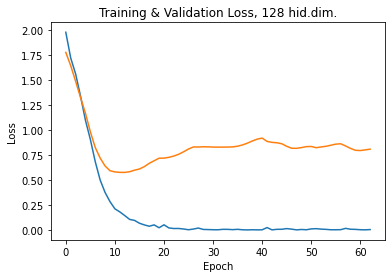

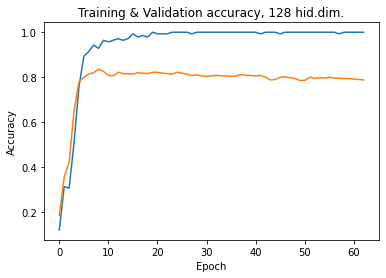

In [ ]:
# Training settings
EPOCHS = 200 
LR = 0.05
WD = 1e-5

hid_dim = [4,8,16,32,64,128]

for i in hid_dim:
  print(i, " hidden dimensions")
  args.cuda = not args.no_cuda and torch.cuda.is_available()

  np.random.seed(args.seed)
  torch.manual_seed(args.seed)
  if args.cuda:
      torch.cuda.manual_seed(args.seed)

  # Model and optimizer
  model = GCN(nfeat=features.shape[1],
              nhid=i,
              nclass=labels.max().item() + 1,
              dropout=args.dropout)
  optimizer = optim.Adam(model.parameters(),
                        lr=LR, weight_decay=WD)
  if args.cuda:
      model.cuda()
      features = features.cuda()
      adj = adj.cuda()
      labels = labels.cuda()
      idx_train = idx_train.cuda()
      idx_val = idx_val.cuda()
      idx_test = idx_test.cuda()
      
  # collect train/valid stats for plots
  loss_tr = []
  acc_tr = []
  loss_v = []
  acc_v = []

  def train(epoch):
      t = time.time()
      model.train()
      optimizer.zero_grad()
      output = model(features, adj)
      # loss_train = F.nll_loss(output[idx_train], labels[idx_train])
      loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
      acc_train = accuracy(output[idx_train], labels[idx_train])

      loss_tr.append(loss_train) # collect train loss
      acc_tr.append(acc_train) # collect train accuracy

      loss_train.backward()
      optimizer.step()

      if not args.fastmode:
          # Evaluate validation set performance separately,
          # deactivates dropout during validation run.
          model.eval()
          output = model(features, adj)

      # loss_val = F.nll_loss(output[idx_val], labels[idx_val])
      loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
      acc_val = accuracy(output[idx_val], labels[idx_val])

      loss_v.append(loss_val) # collect train loss
      acc_v.append(acc_val) # collect train accuracy

      print('Epoch: {:04d}'.format(epoch+1),
            'loss_train: {:.4f}'.format(loss_train.item()),
            'acc_train: {:.4f}'.format(acc_train.item()),
            'loss_val: {:.4f}'.format(loss_val.item()),
            'acc_val: {:.4f}'.format(acc_val.item()),
            'time: {:.4f}s'.format(time.time() - t))
      return loss_val.item()

  def test():
    model = GCN(nfeat=features.shape[1],
                nhid=i,
                nclass=labels.max().item() + 1,
                dropout=args.dropout)
    device = torch.device("cuda")
    model.load_state_dict(torch.load(path))
    model.to(device)
    model.eval()
    output = model(features, adj)
    # loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

  # Define early stopping conditions
  min_val_loss = np.Inf
  n_epochs_stop = 50 # stop after 50 epochs of no improvement
  epochs_no_improve = 0
  
  # Train model
  t_total = time.time()
  for epoch in range(EPOCHS):
      val_loss = train(epoch) # save validation loss after an epoch
      
      # check for validation loss improvement
      if val_loss < min_val_loss:
      # Save the model of the epoch with the best loss
        model_name = 'gcn.pt'
        path = F"/content/drive/My Drive/DL/HW3/{model_name}" 
        torch.save(model.state_dict(), path)
        epochs_no_improve = 0 # set epoch counter with no improvement to 0
        min_val_loss = val_loss
        # print(min_val_loss)
      else:
        epochs_no_improve += 1
        # print(epochs_no_improve)

      # Check early stopping condition
      if epochs_no_improve == n_epochs_stop:
        print('Early stopping!' )
        early_stop = True
        # break
      else:
        continue
      break
      if early_stop:
          print("Stopped")
          break
  print("Optimization Finished!")
  print("Total time elapsed: {:.4f}s".format(time.time() - t_total))



  # Testing
  test()

  # Plot train and valid loss
  plt.plot(loss_tr, label="Train loss")
  plt.plot(loss_v, label="Validation loss")
  plt.title("Training & Validation Loss, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

  # Plot train and valid accuracy
  plt.plot(acc_tr, label="Train accuracy")
  plt.plot(acc_v, label="Validation accuracy")
  plt.title("Training & Validation accuracy, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.show()

###### No weight decay

4  hidden dimensions
Epoch: 0001 loss_train: 2.0343 acc_train: 0.0929 loss_val: 2.0576 acc_val: 0.1060 time: 0.0058s
Epoch: 0002 loss_train: 2.0283 acc_train: 0.1071 loss_val: 2.0499 acc_val: 0.1400 time: 0.0057s
Epoch: 0003 loss_train: 2.0138 acc_train: 0.1286 loss_val: 2.0425 acc_val: 0.1360 time: 0.0057s
Epoch: 0004 loss_train: 2.0029 acc_train: 0.2071 loss_val: 2.0353 acc_val: 0.1360 time: 0.0055s
Epoch: 0005 loss_train: 2.0013 acc_train: 0.2000 loss_val: 2.0284 acc_val: 0.1360 time: 0.0054s
Epoch: 0006 loss_train: 1.9903 acc_train: 0.2000 loss_val: 2.0217 acc_val: 0.1360 time: 0.0057s
Epoch: 0007 loss_train: 1.9877 acc_train: 0.2000 loss_val: 2.0150 acc_val: 0.1360 time: 0.0058s
Epoch: 0008 loss_train: 1.9782 acc_train: 0.2000 loss_val: 2.0085 acc_val: 0.1360 time: 0.0067s
Epoch: 0009 loss_train: 1.9710 acc_train: 0.2000 loss_val: 2.0021 acc_val: 0.1360 time: 0.0054s
Epoch: 0010 loss_train: 1.9588 acc_train: 0.2000 loss_val: 1.9957 acc_val: 0.1360 time: 0.0054s
Epoch: 0011 loss_tr

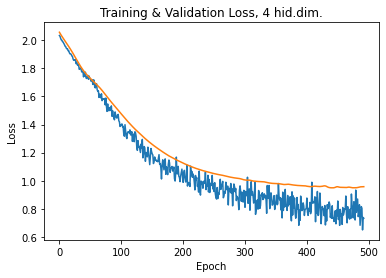

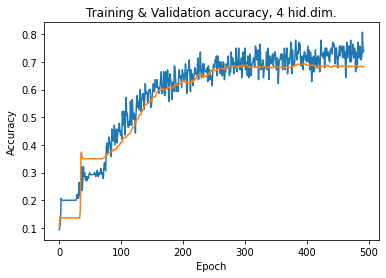

8  hidden dimensions
Epoch: 0001 loss_train: 1.9487 acc_train: 0.1286 loss_val: 1.9088 acc_val: 0.3280 time: 0.0090s
Epoch: 0002 loss_train: 1.9377 acc_train: 0.2357 loss_val: 1.8970 acc_val: 0.3500 time: 0.0060s
Epoch: 0003 loss_train: 1.9280 acc_train: 0.2929 loss_val: 1.8861 acc_val: 0.3500 time: 0.0063s
Epoch: 0004 loss_train: 1.9189 acc_train: 0.2929 loss_val: 1.8757 acc_val: 0.3500 time: 0.0061s
Epoch: 0005 loss_train: 1.9020 acc_train: 0.2929 loss_val: 1.8659 acc_val: 0.3500 time: 0.0059s
Epoch: 0006 loss_train: 1.8979 acc_train: 0.2929 loss_val: 1.8567 acc_val: 0.3500 time: 0.0054s
Epoch: 0007 loss_train: 1.8799 acc_train: 0.2929 loss_val: 1.8480 acc_val: 0.3500 time: 0.0059s
Epoch: 0008 loss_train: 1.8855 acc_train: 0.2929 loss_val: 1.8399 acc_val: 0.3500 time: 0.0053s
Epoch: 0009 loss_train: 1.8606 acc_train: 0.2929 loss_val: 1.8319 acc_val: 0.3500 time: 0.0054s
Epoch: 0010 loss_train: 1.8641 acc_train: 0.2929 loss_val: 1.8242 acc_val: 0.3500 time: 0.0053s
Epoch: 0011 loss_tr

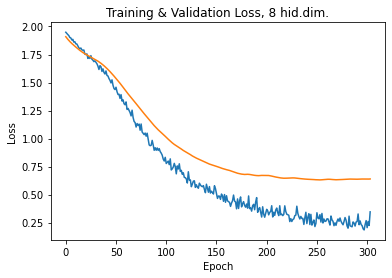

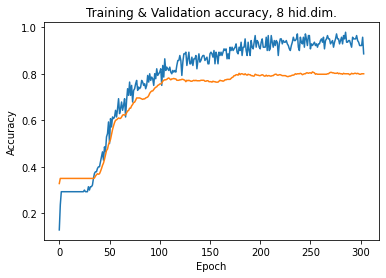

16  hidden dimensions
Epoch: 0001 loss_train: 1.9986 acc_train: 0.1357 loss_val: 2.0009 acc_val: 0.1040 time: 0.0069s
Epoch: 0002 loss_train: 1.9790 acc_train: 0.1357 loss_val: 1.9878 acc_val: 0.1040 time: 0.0055s
Epoch: 0003 loss_train: 1.9758 acc_train: 0.1357 loss_val: 1.9755 acc_val: 0.1040 time: 0.0052s
Epoch: 0004 loss_train: 1.9446 acc_train: 0.1643 loss_val: 1.9636 acc_val: 0.1040 time: 0.0054s
Epoch: 0005 loss_train: 1.9439 acc_train: 0.1786 loss_val: 1.9520 acc_val: 0.1080 time: 0.0052s
Epoch: 0006 loss_train: 1.9382 acc_train: 0.1643 loss_val: 1.9408 acc_val: 0.1820 time: 0.0051s
Epoch: 0007 loss_train: 1.9193 acc_train: 0.2429 loss_val: 1.9298 acc_val: 0.1680 time: 0.0052s
Epoch: 0008 loss_train: 1.9080 acc_train: 0.2143 loss_val: 1.9189 acc_val: 0.1360 time: 0.0053s
Epoch: 0009 loss_train: 1.8964 acc_train: 0.2071 loss_val: 1.9081 acc_val: 0.1360 time: 0.0052s
Epoch: 0010 loss_train: 1.8829 acc_train: 0.2214 loss_val: 1.8971 acc_val: 0.1360 time: 0.0053s
Epoch: 0011 loss_t

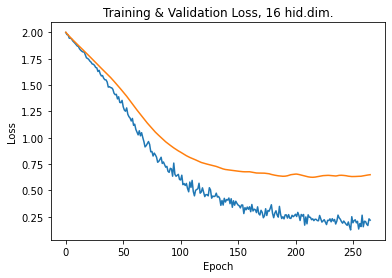

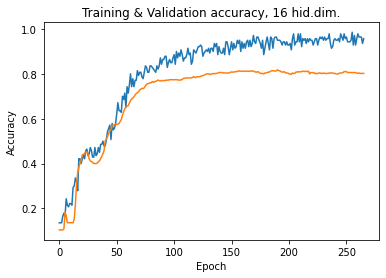

32  hidden dimensions
Epoch: 0001 loss_train: 1.9750 acc_train: 0.0571 loss_val: 1.9347 acc_val: 0.0660 time: 0.0061s
Epoch: 0002 loss_train: 1.9362 acc_train: 0.0643 loss_val: 1.9133 acc_val: 0.0740 time: 0.0062s
Epoch: 0003 loss_train: 1.9172 acc_train: 0.1571 loss_val: 1.8941 acc_val: 0.3500 time: 0.0063s
Epoch: 0004 loss_train: 1.8984 acc_train: 0.2857 loss_val: 1.8768 acc_val: 0.3500 time: 0.0063s
Epoch: 0005 loss_train: 1.8850 acc_train: 0.3071 loss_val: 1.8613 acc_val: 0.3500 time: 0.0061s
Epoch: 0006 loss_train: 1.8622 acc_train: 0.3071 loss_val: 1.8464 acc_val: 0.3500 time: 0.0064s
Epoch: 0007 loss_train: 1.8478 acc_train: 0.3000 loss_val: 1.8320 acc_val: 0.3500 time: 0.0058s
Epoch: 0008 loss_train: 1.8357 acc_train: 0.3000 loss_val: 1.8184 acc_val: 0.3500 time: 0.0059s
Epoch: 0009 loss_train: 1.8165 acc_train: 0.3143 loss_val: 1.8052 acc_val: 0.3500 time: 0.0057s
Epoch: 0010 loss_train: 1.8014 acc_train: 0.3000 loss_val: 1.7928 acc_val: 0.3500 time: 0.0057s
Epoch: 0011 loss_t

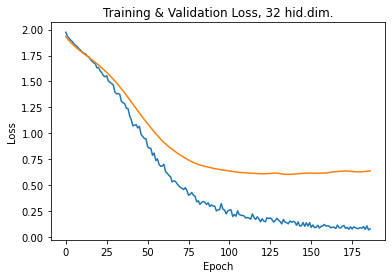

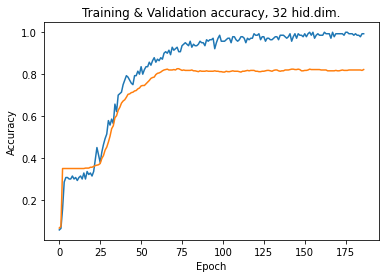

64  hidden dimensions
Epoch: 0001 loss_train: 2.0298 acc_train: 0.1000 loss_val: 1.9679 acc_val: 0.1340 time: 0.0084s
Epoch: 0002 loss_train: 1.9783 acc_train: 0.1071 loss_val: 1.9201 acc_val: 0.1340 time: 0.0075s
Epoch: 0003 loss_train: 1.9179 acc_train: 0.1357 loss_val: 1.8759 acc_val: 0.1360 time: 0.0069s
Epoch: 0004 loss_train: 1.8749 acc_train: 0.2286 loss_val: 1.8360 acc_val: 0.3720 time: 0.0088s
Epoch: 0005 loss_train: 1.8229 acc_train: 0.3357 loss_val: 1.8001 acc_val: 0.3520 time: 0.0060s
Epoch: 0006 loss_train: 1.7772 acc_train: 0.3357 loss_val: 1.7678 acc_val: 0.3500 time: 0.0067s
Epoch: 0007 loss_train: 1.7490 acc_train: 0.3000 loss_val: 1.7390 acc_val: 0.3500 time: 0.0071s
Epoch: 0008 loss_train: 1.7033 acc_train: 0.3071 loss_val: 1.7136 acc_val: 0.3520 time: 0.0062s
Epoch: 0009 loss_train: 1.6688 acc_train: 0.3143 loss_val: 1.6911 acc_val: 0.3560 time: 0.0062s
Epoch: 0010 loss_train: 1.6567 acc_train: 0.3500 loss_val: 1.6714 acc_val: 0.3580 time: 0.0058s
Epoch: 0011 loss_t

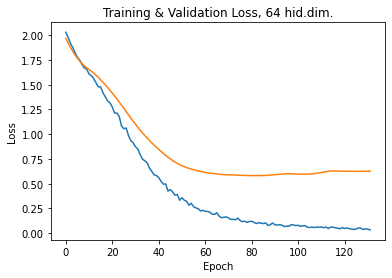

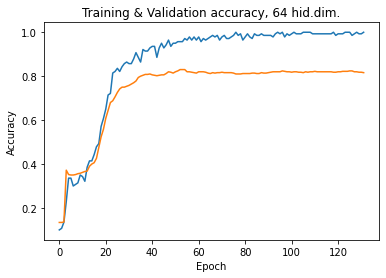

128  hidden dimensions
Epoch: 0001 loss_train: 1.9737 acc_train: 0.0786 loss_val: 1.8863 acc_val: 0.1060 time: 0.0069s
Epoch: 0002 loss_train: 1.8884 acc_train: 0.2000 loss_val: 1.8263 acc_val: 0.3500 time: 0.0061s
Epoch: 0003 loss_train: 1.8175 acc_train: 0.3000 loss_val: 1.7751 acc_val: 0.3500 time: 0.0060s
Epoch: 0004 loss_train: 1.7631 acc_train: 0.3000 loss_val: 1.7318 acc_val: 0.3500 time: 0.0084s
Epoch: 0005 loss_train: 1.7186 acc_train: 0.3000 loss_val: 1.6963 acc_val: 0.3500 time: 0.0073s
Epoch: 0006 loss_train: 1.6752 acc_train: 0.2929 loss_val: 1.6651 acc_val: 0.3500 time: 0.0071s
Epoch: 0007 loss_train: 1.6249 acc_train: 0.3000 loss_val: 1.6366 acc_val: 0.3500 time: 0.0070s
Epoch: 0008 loss_train: 1.5792 acc_train: 0.3143 loss_val: 1.6092 acc_val: 0.3620 time: 0.0074s
Epoch: 0009 loss_train: 1.5324 acc_train: 0.3857 loss_val: 1.5807 acc_val: 0.3740 time: 0.0077s
Epoch: 0010 loss_train: 1.4714 acc_train: 0.4286 loss_val: 1.5500 acc_val: 0.4180 time: 0.0058s
Epoch: 0011 loss_

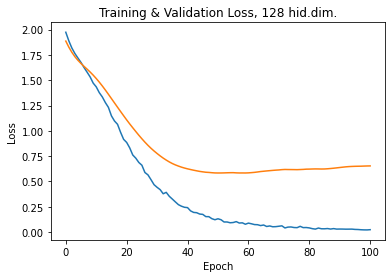

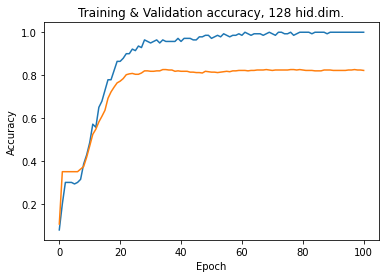

In [ ]:
# Training settings
EPOCHS = 900
LR = 0.01
WD = 0
hid_dim = [4,8,16,32,64,128]

for i in hid_dim:
  print(i, " hidden dimensions")
  args.cuda = not args.no_cuda and torch.cuda.is_available()

  np.random.seed(args.seed)
  torch.manual_seed(args.seed)
  if args.cuda:
      torch.cuda.manual_seed(args.seed)

  # Model and optimizer
  model = GCN(nfeat=features.shape[1],
              nhid=i,
              nclass=labels.max().item() + 1,
              dropout=args.dropout)
  optimizer = optim.Adam(model.parameters(),
                        lr=LR, weight_decay=WD)
  if args.cuda:
      model.cuda()
      features = features.cuda()
      adj = adj.cuda()
      labels = labels.cuda()
      idx_train = idx_train.cuda()
      idx_val = idx_val.cuda()
      idx_test = idx_test.cuda()
      
  # collect train/valid stats for plots
  loss_tr = []
  acc_tr = []
  loss_v = []
  acc_v = []

  def train(epoch):
      t = time.time()
      model.train()
      optimizer.zero_grad()
      output = model(features, adj)
      # loss_train = F.nll_loss(output[idx_train], labels[idx_train])
      loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
      acc_train = accuracy(output[idx_train], labels[idx_train])

      loss_tr.append(loss_train) # collect train loss
      acc_tr.append(acc_train) # collect train accuracy

      loss_train.backward()
      optimizer.step()

      if not args.fastmode:
          # Evaluate validation set performance separately,
          # deactivates dropout during validation run.
          model.eval()
          output = model(features, adj)

      # loss_val = F.nll_loss(output[idx_val], labels[idx_val])
      loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
      acc_val = accuracy(output[idx_val], labels[idx_val])

      loss_v.append(loss_val) # collect train loss
      acc_v.append(acc_val) # collect train accuracy

      print('Epoch: {:04d}'.format(epoch+1),
            'loss_train: {:.4f}'.format(loss_train.item()),
            'acc_train: {:.4f}'.format(acc_train.item()),
            'loss_val: {:.4f}'.format(loss_val.item()),
            'acc_val: {:.4f}'.format(acc_val.item()),
            'time: {:.4f}s'.format(time.time() - t))
      return loss_val.item()

  def test():
    model = GCN(nfeat=features.shape[1],
                nhid=i,
                nclass=labels.max().item() + 1,
                dropout=args.dropout)
    device = torch.device("cuda")
    model.load_state_dict(torch.load(path))
    model.to(device)
    model.eval()
    output = model(features, adj)
    # loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

  # Define early stopping conditions
  min_val_loss = np.Inf
  n_epochs_stop = 50 # stop after 50 epochs of no improvement
  epochs_no_improve = 0
  
  # Train model
  t_total = time.time()
  for epoch in range(EPOCHS):
      val_loss = train(epoch) # save validation loss after an epoch
      
      # check for validation loss improvement
      if val_loss < min_val_loss:
      # Save the model of the epoch with the best loss
        model_name = 'gcn.pt'
        path = F"/content/drive/My Drive/DL/HW3/{model_name}" 
        torch.save(model.state_dict(), path)
        epochs_no_improve = 0 # set epoch counter with no improvement to 0
        min_val_loss = val_loss
        # print(min_val_loss)
      else:
        epochs_no_improve += 1
        # print(epochs_no_improve)

      # Check early stopping condition
      if epochs_no_improve == n_epochs_stop:
        print('Early stopping!' )
        early_stop = True
        # break
      else:
        continue
      break
      if early_stop:
          print("Stopped")
          break
  print("Optimization Finished!")
  print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

  # Testing
  test()

  # Plot train and valid loss
  plt.plot(loss_tr, label="Train loss")
  plt.plot(loss_v, label="Validation loss")
  plt.title("Training & Validation Loss, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

  # Plot train and valid accuracy
  plt.plot(acc_tr, label="Train accuracy")
  plt.plot(acc_v, label="Validation accuracy")
  plt.title("Training & Validation accuracy, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.show()

4  hidden dimensions
Epoch: 0001 loss_train: 1.9954 acc_train: 0.0857 loss_val: 1.9041 acc_val: 0.3500 time: 0.0084s
Epoch: 0002 loss_train: 1.9444 acc_train: 0.2714 loss_val: 1.8621 acc_val: 0.3500 time: 0.0058s
Epoch: 0003 loss_train: 1.9169 acc_train: 0.2929 loss_val: 1.8267 acc_val: 0.3500 time: 0.0055s
Epoch: 0004 loss_train: 1.8751 acc_train: 0.2929 loss_val: 1.7990 acc_val: 0.3500 time: 0.0055s
Epoch: 0005 loss_train: 1.8446 acc_train: 0.2929 loss_val: 1.7800 acc_val: 0.3500 time: 0.0055s
Epoch: 0006 loss_train: 1.8061 acc_train: 0.2929 loss_val: 1.7701 acc_val: 0.3500 time: 0.0056s
Epoch: 0007 loss_train: 1.7720 acc_train: 0.2929 loss_val: 1.7662 acc_val: 0.3500 time: 0.0056s
Epoch: 0008 loss_train: 1.7941 acc_train: 0.2929 loss_val: 1.7633 acc_val: 0.3500 time: 0.0084s
Epoch: 0009 loss_train: 1.7887 acc_train: 0.2929 loss_val: 1.7582 acc_val: 0.3500 time: 0.0056s
Epoch: 0010 loss_train: 1.7606 acc_train: 0.2929 loss_val: 1.7509 acc_val: 0.3500 time: 0.0060s
Epoch: 0011 loss_tr

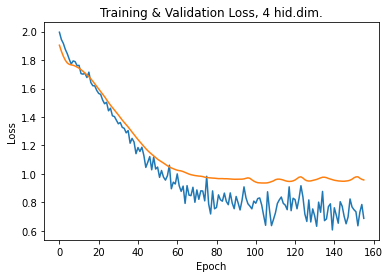

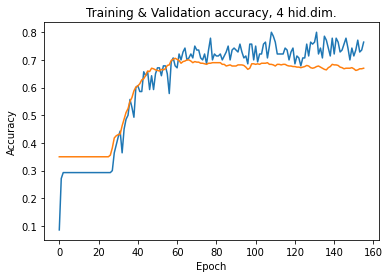

8  hidden dimensions
Epoch: 0001 loss_train: 1.9815 acc_train: 0.1000 loss_val: 1.9486 acc_val: 0.1360 time: 0.0075s
Epoch: 0002 loss_train: 1.9169 acc_train: 0.2000 loss_val: 1.8906 acc_val: 0.1360 time: 0.0056s
Epoch: 0003 loss_train: 1.8626 acc_train: 0.2214 loss_val: 1.8396 acc_val: 0.4560 time: 0.0054s
Epoch: 0004 loss_train: 1.8068 acc_train: 0.3500 loss_val: 1.7972 acc_val: 0.3520 time: 0.0053s
Epoch: 0005 loss_train: 1.7851 acc_train: 0.3000 loss_val: 1.7605 acc_val: 0.3500 time: 0.0053s
Epoch: 0006 loss_train: 1.7422 acc_train: 0.3143 loss_val: 1.7287 acc_val: 0.3500 time: 0.0053s
Epoch: 0007 loss_train: 1.7416 acc_train: 0.2786 loss_val: 1.7015 acc_val: 0.3500 time: 0.0053s
Epoch: 0008 loss_train: 1.6890 acc_train: 0.3000 loss_val: 1.6766 acc_val: 0.3500 time: 0.0054s
Epoch: 0009 loss_train: 1.6492 acc_train: 0.3071 loss_val: 1.6526 acc_val: 0.3500 time: 0.0052s
Epoch: 0010 loss_train: 1.6644 acc_train: 0.3357 loss_val: 1.6270 acc_val: 0.3560 time: 0.0053s
Epoch: 0011 loss_tr

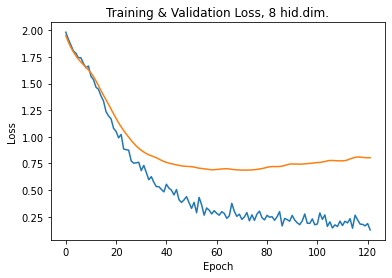

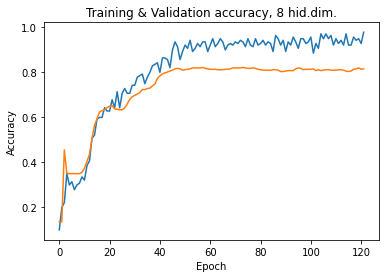

16  hidden dimensions
Epoch: 0001 loss_train: 2.0119 acc_train: 0.0857 loss_val: 1.9252 acc_val: 0.2880 time: 0.0070s
Epoch: 0002 loss_train: 1.9196 acc_train: 0.2571 loss_val: 1.8692 acc_val: 0.3500 time: 0.0054s
Epoch: 0003 loss_train: 1.8772 acc_train: 0.2857 loss_val: 1.8262 acc_val: 0.3500 time: 0.0054s
Epoch: 0004 loss_train: 1.8112 acc_train: 0.3000 loss_val: 1.7941 acc_val: 0.3500 time: 0.0055s
Epoch: 0005 loss_train: 1.7961 acc_train: 0.2929 loss_val: 1.7735 acc_val: 0.3500 time: 0.0063s
Epoch: 0006 loss_train: 1.7745 acc_train: 0.3000 loss_val: 1.7568 acc_val: 0.3500 time: 0.0059s
Epoch: 0007 loss_train: 1.7181 acc_train: 0.2929 loss_val: 1.7371 acc_val: 0.3500 time: 0.0055s
Epoch: 0008 loss_train: 1.7253 acc_train: 0.2929 loss_val: 1.7092 acc_val: 0.3500 time: 0.0053s
Epoch: 0009 loss_train: 1.6925 acc_train: 0.2929 loss_val: 1.6758 acc_val: 0.3500 time: 0.0053s
Epoch: 0010 loss_train: 1.6077 acc_train: 0.3000 loss_val: 1.6419 acc_val: 0.3480 time: 0.0053s
Epoch: 0011 loss_t

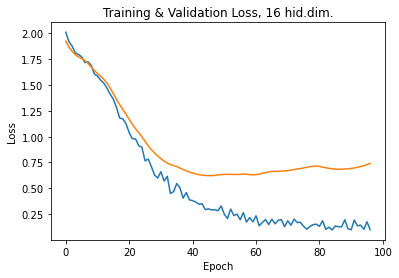

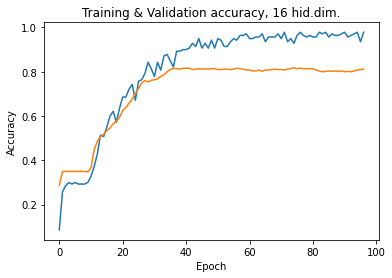

32  hidden dimensions
Epoch: 0001 loss_train: 1.9866 acc_train: 0.1214 loss_val: 1.9024 acc_val: 0.2300 time: 0.0069s
Epoch: 0002 loss_train: 1.8751 acc_train: 0.2929 loss_val: 1.8137 acc_val: 0.4360 time: 0.0055s
Epoch: 0003 loss_train: 1.7910 acc_train: 0.3714 loss_val: 1.7394 acc_val: 0.3920 time: 0.0055s
Epoch: 0004 loss_train: 1.6747 acc_train: 0.4000 loss_val: 1.6947 acc_val: 0.3640 time: 0.0055s
Epoch: 0005 loss_train: 1.6622 acc_train: 0.3643 loss_val: 1.6514 acc_val: 0.3720 time: 0.0054s
Epoch: 0006 loss_train: 1.5678 acc_train: 0.3786 loss_val: 1.5896 acc_val: 0.4000 time: 0.0055s
Epoch: 0007 loss_train: 1.4962 acc_train: 0.4500 loss_val: 1.5209 acc_val: 0.4420 time: 0.0053s
Epoch: 0008 loss_train: 1.4128 acc_train: 0.4714 loss_val: 1.4566 acc_val: 0.4600 time: 0.0053s
Epoch: 0009 loss_train: 1.3266 acc_train: 0.4929 loss_val: 1.3953 acc_val: 0.5140 time: 0.0060s
Epoch: 0010 loss_train: 1.2165 acc_train: 0.6143 loss_val: 1.3272 acc_val: 0.5920 time: 0.0054s
Epoch: 0011 loss_t

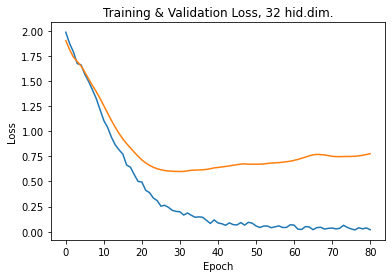

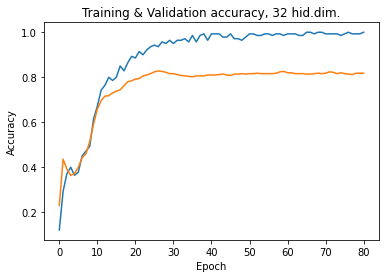

64  hidden dimensions
Epoch: 0001 loss_train: 1.8847 acc_train: 0.3214 loss_val: 1.7422 acc_val: 0.3500 time: 0.0122s
Epoch: 0002 loss_train: 1.7346 acc_train: 0.2929 loss_val: 1.7129 acc_val: 0.3660 time: 0.0061s
Epoch: 0003 loss_train: 1.6434 acc_train: 0.3643 loss_val: 1.6358 acc_val: 0.4380 time: 0.0070s
Epoch: 0004 loss_train: 1.5152 acc_train: 0.4786 loss_val: 1.5161 acc_val: 0.5180 time: 0.0062s
Epoch: 0005 loss_train: 1.3544 acc_train: 0.5571 loss_val: 1.3930 acc_val: 0.5740 time: 0.0057s
Epoch: 0006 loss_train: 1.2329 acc_train: 0.6357 loss_val: 1.2720 acc_val: 0.6020 time: 0.0082s
Epoch: 0007 loss_train: 1.0745 acc_train: 0.6929 loss_val: 1.1515 acc_val: 0.6620 time: 0.0057s
Epoch: 0008 loss_train: 0.9151 acc_train: 0.7571 loss_val: 1.0353 acc_val: 0.7220 time: 0.0057s
Epoch: 0009 loss_train: 0.7557 acc_train: 0.8429 loss_val: 0.9294 acc_val: 0.7660 time: 0.0063s
Epoch: 0010 loss_train: 0.6376 acc_train: 0.9286 loss_val: 0.8348 acc_val: 0.7840 time: 0.0058s
Epoch: 0011 loss_t

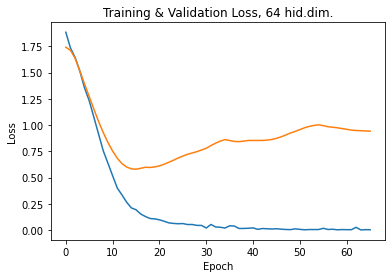

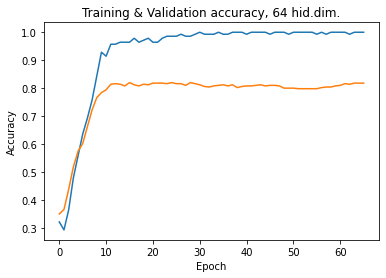

128  hidden dimensions
Epoch: 0001 loss_train: 1.9717 acc_train: 0.0571 loss_val: 1.7529 acc_val: 0.3520 time: 0.0064s
Epoch: 0002 loss_train: 1.7163 acc_train: 0.3071 loss_val: 1.6640 acc_val: 0.3640 time: 0.0060s
Epoch: 0003 loss_train: 1.5952 acc_train: 0.3857 loss_val: 1.5630 acc_val: 0.4480 time: 0.0059s
Epoch: 0004 loss_train: 1.4111 acc_train: 0.5000 loss_val: 1.4286 acc_val: 0.5640 time: 0.0060s
Epoch: 0005 loss_train: 1.2301 acc_train: 0.6214 loss_val: 1.2844 acc_val: 0.6180 time: 0.0059s
Epoch: 0006 loss_train: 1.0438 acc_train: 0.7000 loss_val: 1.1394 acc_val: 0.7020 time: 0.0059s
Epoch: 0007 loss_train: 0.8967 acc_train: 0.8071 loss_val: 1.0011 acc_val: 0.7560 time: 0.0065s
Epoch: 0008 loss_train: 0.7229 acc_train: 0.8429 loss_val: 0.8857 acc_val: 0.7800 time: 0.0059s
Epoch: 0009 loss_train: 0.5945 acc_train: 0.9000 loss_val: 0.7897 acc_val: 0.7920 time: 0.0058s
Epoch: 0010 loss_train: 0.4781 acc_train: 0.9357 loss_val: 0.7142 acc_val: 0.7960 time: 0.0059s
Epoch: 0011 loss_

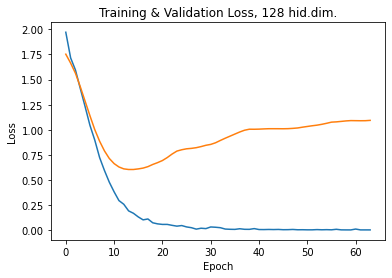

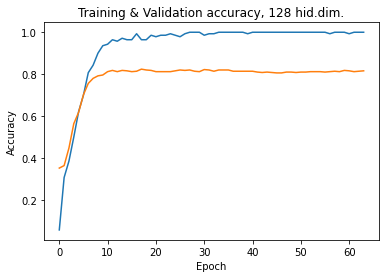

In [ ]:
# Training settings
EPOCHS = 200 
LR = 0.05
WD = 0

hid_dim = [4,8,16,32,64,128]

for i in hid_dim:
  print(i, " hidden dimensions")
  args.cuda = not args.no_cuda and torch.cuda.is_available()

  np.random.seed(args.seed)
  torch.manual_seed(args.seed)
  if args.cuda:
      torch.cuda.manual_seed(args.seed)

  # Model and optimizer
  model = GCN(nfeat=features.shape[1],
              nhid=i,
              nclass=labels.max().item() + 1,
              dropout=args.dropout)
  optimizer = optim.Adam(model.parameters(),
                        lr=LR, weight_decay=WD)
  if args.cuda:
      model.cuda()
      features = features.cuda()
      adj = adj.cuda()
      labels = labels.cuda()
      idx_train = idx_train.cuda()
      idx_val = idx_val.cuda()
      idx_test = idx_test.cuda()
      
  # collect train/valid stats for plots
  loss_tr = []
  acc_tr = []
  loss_v = []
  acc_v = []

  def train(epoch):
      t = time.time()
      model.train()
      optimizer.zero_grad()
      output = model(features, adj)
      # loss_train = F.nll_loss(output[idx_train], labels[idx_train])
      loss_train = F.cross_entropy(output[idx_train], labels[idx_train])
      acc_train = accuracy(output[idx_train], labels[idx_train])

      loss_tr.append(loss_train) # collect train loss
      acc_tr.append(acc_train) # collect train accuracy

      loss_train.backward()
      optimizer.step()

      if not args.fastmode:
          # Evaluate validation set performance separately,
          # deactivates dropout during validation run.
          model.eval()
          output = model(features, adj)

      # loss_val = F.nll_loss(output[idx_val], labels[idx_val])
      loss_val = F.cross_entropy(output[idx_val], labels[idx_val])
      acc_val = accuracy(output[idx_val], labels[idx_val])

      loss_v.append(loss_val) # collect train loss
      acc_v.append(acc_val) # collect train accuracy

      print('Epoch: {:04d}'.format(epoch+1),
            'loss_train: {:.4f}'.format(loss_train.item()),
            'acc_train: {:.4f}'.format(acc_train.item()),
            'loss_val: {:.4f}'.format(loss_val.item()),
            'acc_val: {:.4f}'.format(acc_val.item()),
            'time: {:.4f}s'.format(time.time() - t))
      return loss_val.item()

  def test():
    model = GCN(nfeat=features.shape[1],
                nhid=i,
                nclass=labels.max().item() + 1,
                dropout=args.dropout)
    device = torch.device("cuda")
    model.load_state_dict(torch.load(path))
    model.to(device)
    model.eval()
    output = model(features, adj)
    # loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    loss_test = F.cross_entropy(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()))

  # Define early stopping conditions
  min_val_loss = np.Inf
  n_epochs_stop = 50 # stop after 50 epochs of no improvement
  epochs_no_improve = 0
  
  # Train model
  t_total = time.time()
  for epoch in range(EPOCHS):
      val_loss = train(epoch) # save validation loss after an epoch
      
      # check for validation loss improvement
      if val_loss < min_val_loss:
      # Save the model of the epoch with the best loss
        model_name = 'gcn.pt'
        path = F"/content/drive/My Drive/DL/HW3/{model_name}" 
        torch.save(model.state_dict(), path)
        epochs_no_improve = 0 # set epoch counter with no improvement to 0
        min_val_loss = val_loss
        # print(min_val_loss)
      else:
        epochs_no_improve += 1
        # print(epochs_no_improve)

      # Check early stopping condition
      if epochs_no_improve == n_epochs_stop:
        print('Early stopping!' )
        early_stop = True
        # break
      else:
        continue
      break
      if early_stop:
          print("Stopped")
          break
  print("Optimization Finished!")
  print("Total time elapsed: {:.4f}s".format(time.time() - t_total))



  # Testing
  test()

  # Plot train and valid loss
  plt.plot(loss_tr, label="Train loss")
  plt.plot(loss_v, label="Validation loss")
  plt.title("Training & Validation Loss, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.show()

  # Plot train and valid accuracy
  plt.plot(acc_tr, label="Train accuracy")
  plt.plot(acc_v, label="Validation accuracy")
  plt.title("Training & Validation accuracy, " + str(i) + " hid.dim.")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.show()